<a href="https://colab.research.google.com/github/LuisFTacla/WDW_Attendance_Calculator/blob/main/Analise_Rock_n_Roller_Coaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>ANÁLISE EXPLORATÓRIA DA ATRAÇÃO ROCK'N'ROLLER COASTER</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

# Fonte dos dados: 

https://touringplans.com/blog/2018/06/25/disney-world-wait-times-available-for-data-science-and-machine-learning/



### Variáveis utilizadas

> ### Data e hora
> ***

Instante em que as observações foram realizadas.

> ### Tempo de fila
> ***

Tempo estimado de espera que um visitante que entrasse na fila no dado instante teria de aguardar para andar na atração.

> ### Status
> ***

Status da atração em dado momentoo (aberta (1) / fechada (0)).


#### <font color='red'>Observação</font>
***
> Os dados brutos necessitam dos seguintes tratamento antes de serem analisados:
> 1. Eliminar os registros onde o <b>tempo de fila</b> é inválido (-999);
> 2. Eliminar os registros onde o <b>tempo de fila</b> é NaN;
> 3. Renomear as colunas para 'Data e hora' e 'Tempo de Fila';
> 4. Remover coluna <b>SACTMIN</b> devido a ausência da grande maioria de dados;


### Importando bibliotecas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
rrc = pd.read_csv('https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Dados/TouringPlans/Rides/Raw_Data/rock_n_rollercoaster.csv')

In [3]:
rrc.head(10)

,date,datetime,SACTMIN,SPOSTMIN
0,01/01/2015,2015-01-01 07:46:22,NaN,5.0
1,01/01/2015,2015-01-01 07:53:19,NaN,5.0
2,01/01/2015,2015-01-01 08:04:29,NaN,20.0
3,01/01/2015,2015-01-01 08:11:19,NaN,20.0
4,01/01/2015,2015-01-01 08:16:29,NaN,20.0
5,01/01/2015,2015-01-01 08:18:22,NaN,20.0
6,01/01/2015,2015-01-01 08:24:23,19.0,NaN
7,01/01/2015,2015-01-01 08:24:37,NaN,20.0
8,01/01/2015,2015-01-01 08:25:19,NaN,20.0
9,01/01/2015,2015-01-01 08:27:37,NaN,30.0


# <font color=green>2 TRATAMENTO DOS DADOS</font>
***

Para o tratamento dos dados, são declaradas funções que recebem o dataframe como parâmetro e, em cada uma, exerce uma modificação específica ao conjunto de dados retornando, por final, o dataframe tratado.

## <font color=green>2.1 Remoção da coluna 'SACTMIN'</font>
***

Coluna 'SACTMIN' possui mais lacunas do que dados úteis, por isso faz-se necessário removê-la.

In [4]:
def remove_sactmin(dados): 
  dados.drop(columns = ['SACTMIN'], inplace = True)
  return dados

## <font color=green>2.2 Remoção de linhas com dados ausentes (NaN) na coluna 'SPOSTMIN'</font>
***


In [5]:
def remove_dados_ausentes(dados):
  dados.dropna(inplace= True)
  return dados

## <font color=green>2.3 Conversão das datas e horas</font>
***

Os dados de 'datetime' estão armazenados como strings. Nesta função, é feita a conversão para timestamps os dados são cpoiados para a coluna recém criada 'data_e_hora'.

In [6]:
def to_datetime(dados):
  dados['data_e_hora'] = pd.to_datetime(dados['datetime'])
  return dados

## <font color=green>2.4 Criação da coluna 'tempo_de_fila' e copiando os dados da coluna 'SPOSTMIN'</font>
***

In [7]:
def cria_coluna_tempo_de_fila(dados):
  dados['tempo_de_fila'] = dados['SPOSTMIN']
  return dados

## <font color=green>2.5 Removendo colunas</font>
***

As colunas 'SPOSTMIN', 'date' e 'datetime' ja possuem seus dados devidamente convertidos e copiados nas colunas criadas, logo, pode-se fazer a remoção.



In [8]:
def remove_colunas(dados):
  dados.drop(columns = ['SPOSTMIN', 'date', 'datetime'], inplace = True)
  return dados

## <font color=green>2.6 Reset Index</font>
***
Com o apagamento de linhas, a numeração do índice contém lacunas.

In [9]:
def reset_index(dados):
  dados.reset_index(drop = True, inplace = True)
  return dados

## <font color=green>2.7 Tratamento</font>
***

Para evitar chamar cada função manualmente, é declarada uma função geral que, dentro dela, são chamadas as funções acima em ordem.

In [10]:
def tratamento_dados(dados):
  remove_sactmin(dados)
  remove_dados_ausentes(dados)
  to_datetime(dados)
  cria_coluna_tempo_de_fila(dados)
  remove_colunas(dados)
  reset_index(dados)

Tratando os dados:

In [11]:
tratamento_dados(rrc)

Visualizando os dados:

In [12]:
rrc.head(10)

,data_e_hora,tempo_de_fila
0,2015-01-01 07:46:22,5.0
1,2015-01-01 07:53:19,5.0
2,2015-01-01 08:04:29,20.0
3,2015-01-01 08:11:19,20.0
4,2015-01-01 08:16:29,20.0
5,2015-01-01 08:18:22,20.0
6,2015-01-01 08:24:37,20.0
7,2015-01-01 08:25:19,20.0
8,2015-01-01 08:27:37,30.0
9,2015-01-01 08:31:20,30.0


## <font color=green>2.8 Filtrando os dados</font>
***

In [13]:
rrc.tempo_de_fila.min()

-999.0

Como podemos ver na célula acima, ainda não terminamos a "limpeza" dos dados! Existem dados inválidos, com valores de -999. Para removê-los, basta aplicarmos um filtro no dataframe:

In [14]:
filtro = rrc.tempo_de_fila >= 0
rrc = rrc[filtro]

In [15]:
rrc.tempo_de_fila.min()

0.0

# <font color=green>3 AJUSTE DOS DADOS</font>
***

Os dados já estão tratados, porém nota-se que as observações foram feitas em horários muito "quebrados". A fim de tornar a plotagem mais esteticamente agradável, iremos ajustar o dataframe para mostrar os dados em instantes de 5 em 5 minutos.


Para fazer esse ajuste, será usada a função de interpolação **interp()** da biblioteca **numpy**. Essa função será chamada da seguinte forma:


> Y_interp = np.interp(X_interp, X, Y)


Sendo:

Y_interp = o resultado final da interpolação, no caso, os dados ajustados;

X_interp = o 'passo' onde os dados serão 'encaixados', ou seja, os instantes listados de 5 em 5 minutos;

X = os instantes das observações, em horários não ajustados;

Y = os dados de tempos de fila.


Antes de realizar a interpolação, precisamos fazer duas coisas: criar um dataframe de 'base' em que listaremos os instantes de 5 em 5 minutos, o qual usaremos na interpolação; unir a base com os dados, reordenar de acordo com a data e filtrar este novo dataframe. 

#### <font color='red'>Observação</font>
***
> Este último passo se faz necessário pois, como os parques não operam durante a madrugada, não há observações nos dados brutos. O problema seria visto durante a plotagem dos gráficos diários. Como a última observação de um dia i e a primeira do dia i+1 não são iguais a zero, a função interp iria atribuir valores diferentes de zero nos horários de parque fechado.

> Exemplificando: supondo que no dia 25, o último dado foi obtido às 23h37, com a fila tendo 5 minutos de duração. No dia 26, por sua vez, o primeiro dado, obtido às 7h49, mostra que a fila está com 10 minutos. A função interp iria atribuir a todo esse intervalo valores crescentes entre 5 e 10 minutos, como se houvesse alguma fila durante a madrugada, o que não condiz com a realidade.

## <font color=green>3.1 Criando dataframe 'base'</font>
***

#### <font color='red'>Observação</font>
***
> O número de observações do dataframe base é obtido com os seguintes dados:

365 dias por ano;

5 anos de dados (2015 a 2019);

1 dia a mais por ano bissexto (2016);

24 horas por dia;

12 intervalos de 5 minutos dentro de 1 hora.

In [16]:
# Calculando numero de observacoes
n_observacoes = ((365 * 5) + 1) * 24 * 12


# Criação de um índice de datas/horas
instantes_5_em_5 = pd.date_range(start='1/1/2015',
                                 periods = n_observacoes,  
                                 freq = '5min')

# Criação do dataframe de base
base = pd.DataFrame(index = range(0,n_observacoes), 
                    columns = ['data_e_hora', 
                               'tempo_de_fila'])
base['data_e_hora'] = instantes_5_em_5
base['tempo_de_fila'] = 0

In [17]:
base.head(10)

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0
1,2015-01-01 00:05:00,0
2,2015-01-01 00:10:00,0
3,2015-01-01 00:15:00,0
4,2015-01-01 00:20:00,0
5,2015-01-01 00:25:00,0
6,2015-01-01 00:30:00,0
7,2015-01-01 00:35:00,0
8,2015-01-01 00:40:00,0
9,2015-01-01 00:45:00,0


## <font color=green>3.2 Unindo dataframes base + dados</font>
***

In [18]:
rrc_df = base.append(rrc)

In [19]:
rrc_df

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
211432,2019-12-31 22:58:02,45.0
211433,2019-12-31 23:09:02,35.0
211434,2019-12-31 23:16:02,35.0
211435,2019-12-31 23:23:02,35.0


## <font color=green>3.3 Ordenando dados pela data e hora</font>
***

In [20]:
rrc_df.sort_values(by = ['data_e_hora'], inplace = True)

In [21]:
rrc_df

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
525883,2019-12-31 23:35:00,0.0
525884,2019-12-31 23:40:00,0.0
525885,2019-12-31 23:45:00,0.0
525886,2019-12-31 23:50:00,0.0


## <font color=green>3.4 Reset Index</font>
***

In [22]:
reset_index(rrc_df)

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
725259,2019-12-31 23:35:00,0.0
725260,2019-12-31 23:40:00,0.0
725261,2019-12-31 23:45:00,0.0
725262,2019-12-31 23:50:00,0.0


## <font color=green>3.5 Apagando linhas</font>
***

#### <font color='red'>Observação</font>
***
> Esse passo é necessário pois ao misturar os dataframes base e dados, em meio aos dados, existem algumas linhas com valores iguais a zero, vindas do dataframe de base. Neste passo, iremos criar uma coluna 'apagar' que receberá valores booleanos. Se o campo em que o algoritmo analisar cumprir uma das condições, este será deletado.

In [23]:
rrc_df['apagar'] = 0

In [24]:
rrc_df

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
725259,2019-12-31 23:35:00,0.0,0
725260,2019-12-31 23:40:00,0.0,0
725261,2019-12-31 23:45:00,0.0,0
725262,2019-12-31 23:50:00,0.0,0


A condição para uma linha ser deletada é se, primeiro, o valor do tempo de fila dela for igual à zero, e se um dos dois valores seguintes ou dois valores anteriores de tempos de fila for diferente de zero. Ou seja, caso os quatro sejam iguais à zero, a linha permanece. Mas se apenas um deles for diferente de zero, a linha é deletada.

In [25]:
for i in range(0,len(rrc_df)):
    if 1 < i < len(rrc_df) - 2:
      if (rrc_df.tempo_de_fila[i] == 0):
        c1 = (rrc_df.tempo_de_fila[i + 1] != 0)
        c2 = (rrc_df.tempo_de_fila[i - 1] != 0)
        c3 = (rrc_df.tempo_de_fila[i + 2] != 0)
        c4 = (rrc_df.tempo_de_fila[i - 2] != 0)
        if c1 or c2 or c3 or c4:
          rrc_df.apagar[i] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Essa seleção pode ser notada logo no final da série de dados:

In [26]:
rrc_df.tail(10)

,data_e_hora,tempo_de_fila,apagar
725254,2019-12-31 23:20:00,0.0,1
725255,2019-12-31 23:23:02,35.0,0
725256,2019-12-31 23:25:00,0.0,1
725257,2019-12-31 23:30:00,0.0,1
725258,2019-12-31 23:30:02,35.0,0
725259,2019-12-31 23:35:00,0.0,1
725260,2019-12-31 23:40:00,0.0,1
725261,2019-12-31 23:45:00,0.0,0
725262,2019-12-31 23:50:00,0.0,0
725263,2019-12-31 23:55:00,0.0,0


Feita a seleção, agora basta apenas filtrar o dataframe.

In [27]:
filtro2 = rrc_df.apagar == 0 
rrc_df = rrc_df[filtro2]

Podemos notar que o filtro foi aplicado com sucesso:

In [28]:
rrc_df.tail(10)

,data_e_hora,tempo_de_fila,apagar
725242,2019-12-31 22:44:01,60.0,0
725245,2019-12-31 22:51:02,45.0,0
725247,2019-12-31 22:58:02,45.0,0
725250,2019-12-31 23:09:02,35.0,0
725253,2019-12-31 23:16:02,35.0,0
725255,2019-12-31 23:23:02,35.0,0
725258,2019-12-31 23:30:02,35.0,0
725261,2019-12-31 23:45:00,0.0,0
725262,2019-12-31 23:50:00,0.0,0
725263,2019-12-31 23:55:00,0.0,0


## <font color=green>3.6 Reset Index e deletando a coluna 'apagar'</font>
***

In [29]:
reset_index(rrc_df)

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
455491,2019-12-31 23:23:02,35.0,0
455492,2019-12-31 23:30:02,35.0,0
455493,2019-12-31 23:45:00,0.0,0
455494,2019-12-31 23:50:00,0.0,0


In [30]:
rrc_df.drop(columns = ['apagar'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
rrc_df

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
455491,2019-12-31 23:23:02,35.0
455492,2019-12-31 23:30:02,35.0
455493,2019-12-31 23:45:00,0.0
455494,2019-12-31 23:50:00,0.0


## <font color=green>3.7 Interpolação dos tempos de fila</font>
***

In [32]:
X_interp = base.data_e_hora
X = rrc_df.data_e_hora
Y = rrc_df.tempo_de_fila

Y_interp = np.interp(X_interp, X, Y)

## <font color=green>3.8 Criação do dataframe final</font>
***

In [33]:
RocknRollerCoaster = pd.DataFrame(index = range(0,n_observacoes), 
                                  columns = ['data_e_hora', 'tempo_de_fila'])
RocknRollerCoaster['data_e_hora'] = instantes_5_em_5
RocknRollerCoaster['tempo_de_fila'] = np.around(Y_interp)

In [34]:
RocknRollerCoaster

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
525883,2019-12-31 23:35:00,23.0
525884,2019-12-31 23:40:00,12.0
525885,2019-12-31 23:45:00,0.0
525886,2019-12-31 23:50:00,0.0


# <font color=green>4 GRÁFICOS</font>
***

## <font color=green>4.1 Gráficos diários</font>
***

Para plotar a variação da fila ao longo de um dia, declaramos uma função que recebe como parâmetros os valores da data escolhida (dia, mês e ano).


In [35]:
def plota_fila_diaria (d, m, y):
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(RocknRollerCoaster['data_e_hora'], 
            RocknRollerCoaster['tempo_de_fila'], 
            color = 'g')
  data_escolhida = datetime(y, m, d)
  dia_seguinte = data_escolhida + timedelta(days = 1)
  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Tempo de fila ao longo do dia {}/{}/{}'.format(d, m, y), 
                 fontsize = 25)
  eixo.legend(['Tempo de fila'], loc = 'upper right', fontsize = 15)

Para exemplificar, serão plotadas 6 datas:

*   25/12/2015 - Natal
*   04/07/2016 - Independência dos EUA
*   06/09/2017 - Baixa temporada (pouco movimento esperado)
*   31/12/2018 - Véspera de Ano Novo
*   1/1/2019 - Inauguração de Star Wars Galaxy's Edge
*   29/08/2019 - Inauguração de Star Wars Galaxy's Edge



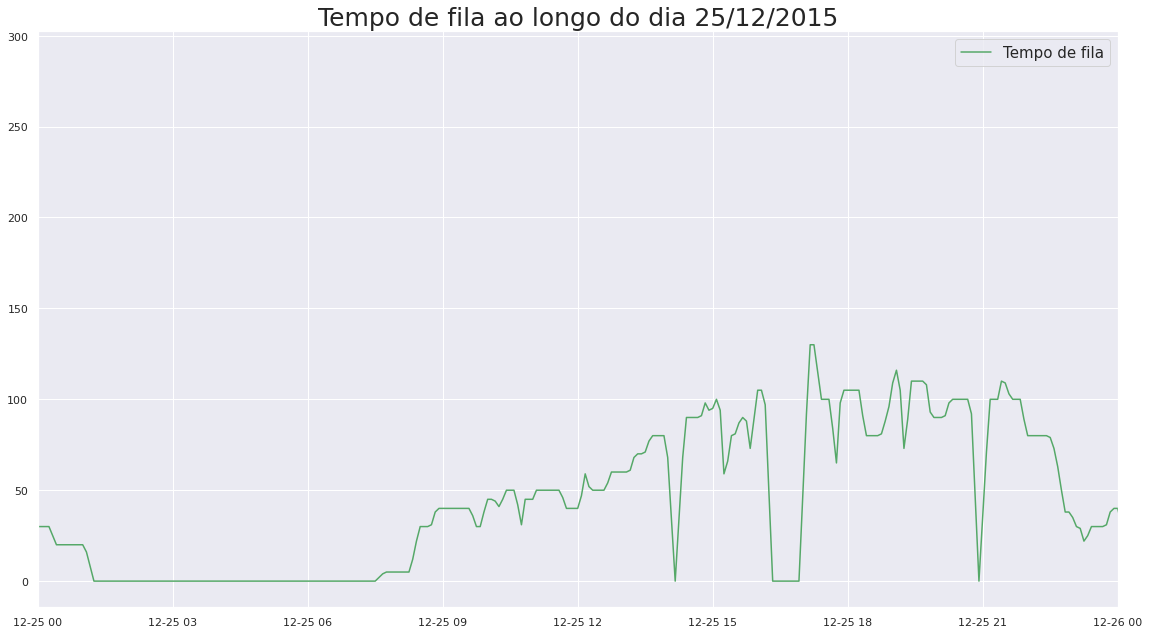

In [36]:
plota_fila_diaria(25, 12, 2015)

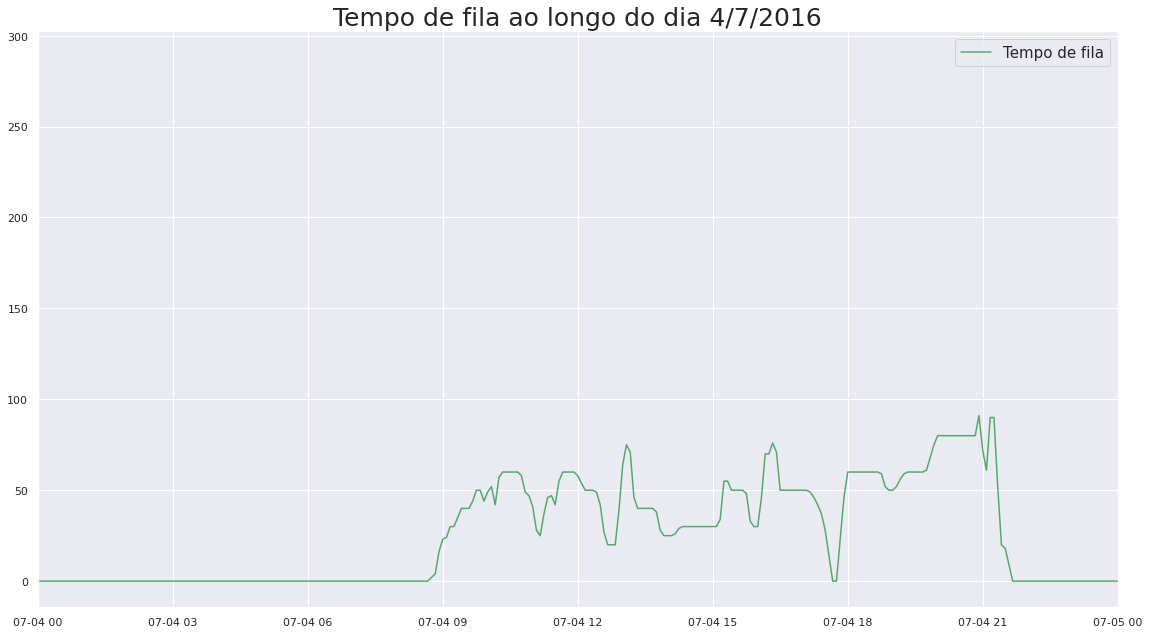

In [37]:
plota_fila_diaria(4, 7, 2016)

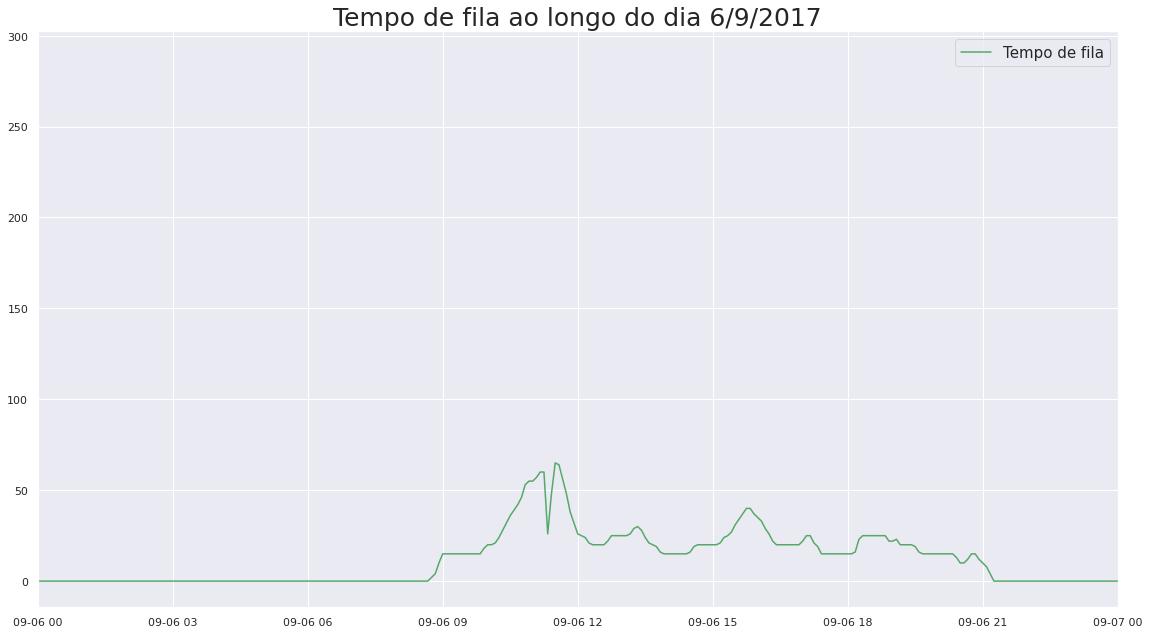

In [38]:
plota_fila_diaria(6, 9, 2017)

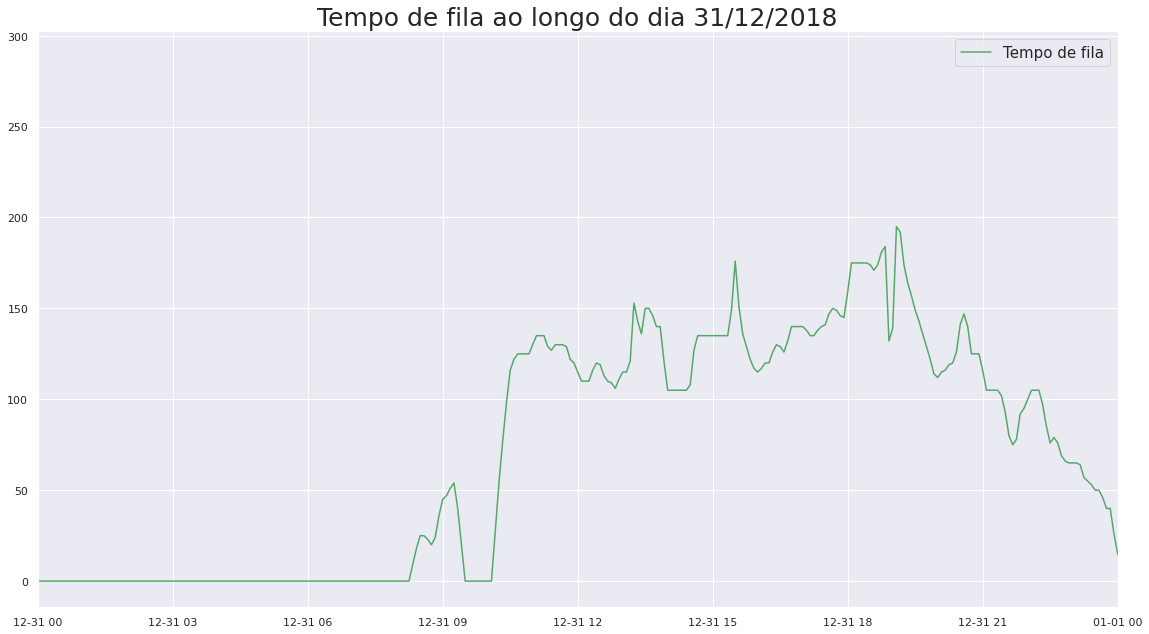

In [39]:
plota_fila_diaria(31, 12, 2018)

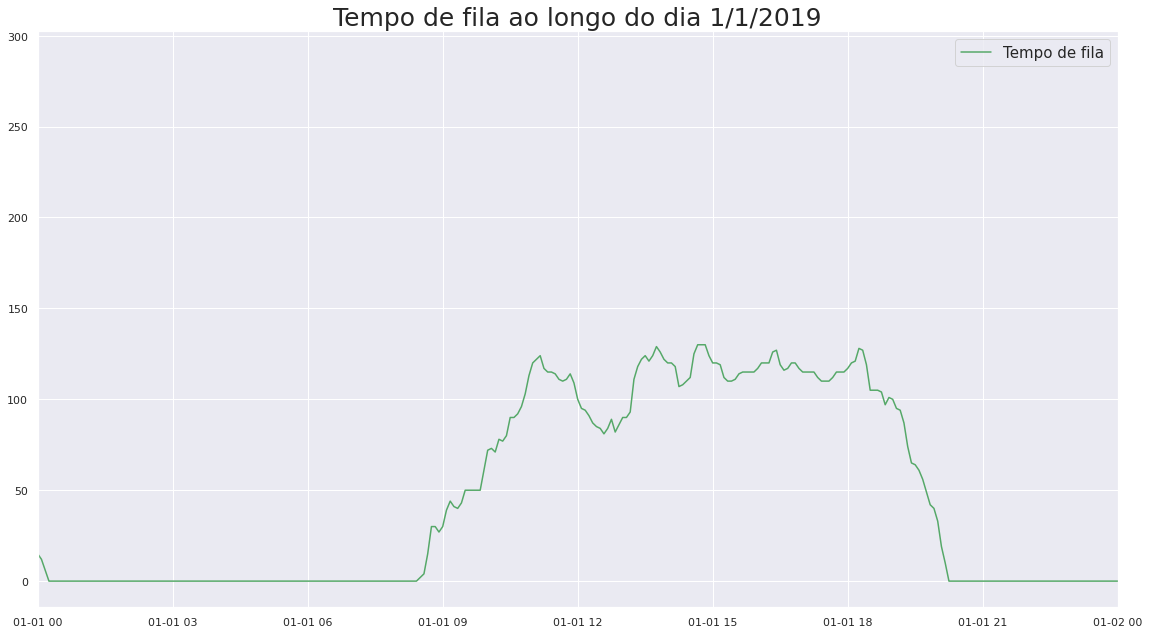

In [40]:
plota_fila_diaria(1, 1, 2019)

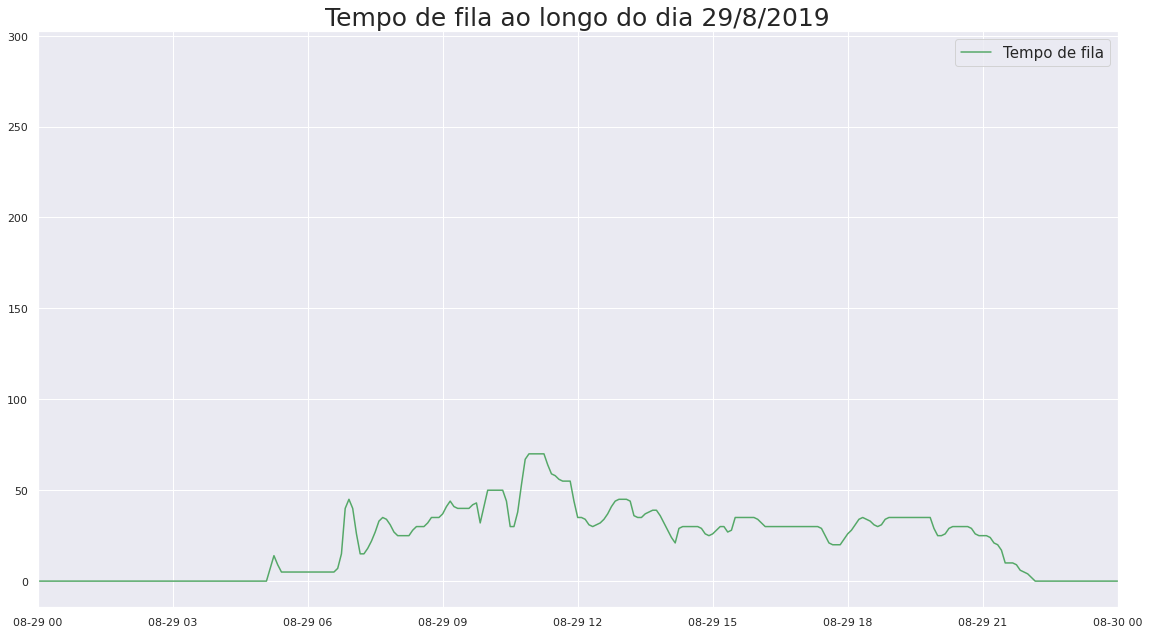

In [41]:
plota_fila_diaria(29, 8, 2019)

Temos gráficos de feriados, dia de inauguração no parque e um dia de baixa temporada.

Algumas conclusões podemos tirar dos gráficos plotados:

A temporada de final de ano aparenta ser mais cheia do que no verão (4 de julho);

A inauguração de Star Wars Galaxy's Edge não trouxe muito movimento para a Rock'n'Roller Coaster, porém, pode-se reparar que no dia, o parque foi aberto antes das 6h da manhã. Em outras atrações, o movimento pode ter sido maior;

Alguns gráficos apresentaram 'vales' significativos, isso é, com o tempo de fila marcando zero minutos no meio do dia. Isso provavelmente é um indicativo que naquele horário, a atração apresentou alguma falha que exigiu manutenção, retomando em seguida a operação.

## <font color=green>4.2 Gráficos anuais</font>
***

Para gerar os gráficos anuais, é preciso, inicialmente, agrupar os dados. Para cada dia, os dados foram agrupados pela média dos tempos de fila. Porém, não iremos considerar os dados de quando a atração estava fechada, seja por manutenção ou pelo parque estar fechado. Resumidamente, os tempos de fila iguais à zero serão descartados.

Para isso, criamos a coluna 'Status', na qual, através de uma variável booleana, informaremos se o brinquedo está aberto (1) ou fechado (0) e a condição para tal será o valor do tempo de fila.

In [42]:
RocknRollerCoaster['Status'] = 0

In [43]:
RocknRollerCoaster

,data_e_hora,tempo_de_fila,Status
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
525883,2019-12-31 23:35:00,23.0,0
525884,2019-12-31 23:40:00,12.0,0
525885,2019-12-31 23:45:00,0.0,0
525886,2019-12-31 23:50:00,0.0,0


In [44]:
for i in range(0,len(RocknRollerCoaster)):
  if RocknRollerCoaster.tempo_de_fila[i] != 0:
    RocknRollerCoaster.Status[i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Semelhante a procedimentos anteriores, filtramos os dados de acordo com a coluna 'Status'.

In [45]:
filtro3 = RocknRollerCoaster.Status == 1

In [46]:
RocknRollerCoaster_Filtrado = RocknRollerCoaster[filtro3]

In [47]:
RocknRollerCoaster_Filtrado

,data_e_hora,tempo_de_fila,Status
92,2015-01-01 07:40:00,2.0,1
93,2015-01-01 07:45:00,4.0,1
94,2015-01-01 07:50:00,5.0,1
95,2015-01-01 07:55:00,7.0,1
96,2015-01-01 08:00:00,14.0,1
...,...,...,...
525880,2019-12-31 23:20:00,35.0,1
525881,2019-12-31 23:25:00,35.0,1
525882,2019-12-31 23:30:00,35.0,1
525883,2019-12-31 23:35:00,23.0,1


Podemos, agora, deletar a coluna 'Status'.

In [48]:
RocknRollerCoaster_Filtrado.drop(columns = ['Status'], 
                                 inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
RocknRollerCoaster_Filtrado

,data_e_hora,tempo_de_fila
92,2015-01-01 07:40:00,2.0
93,2015-01-01 07:45:00,4.0
94,2015-01-01 07:50:00,5.0
95,2015-01-01 07:55:00,7.0
96,2015-01-01 08:00:00,14.0
...,...,...
525880,2019-12-31 23:20:00,35.0
525881,2019-12-31 23:25:00,35.0
525882,2019-12-31 23:30:00,35.0
525883,2019-12-31 23:35:00,23.0


Agora sim, agrupamos os dados pela data e calculamos o tempo médio de fila para cada dia.

In [50]:
medias = RocknRollerCoaster_Filtrado.groupby(RocknRollerCoaster_Filtrado['data_e_hora'].dt.date)['tempo_de_fila'].mean()

Podemos observar que um array foi criado com os valores médios:

In [51]:
medias

data_e_hora
2015-01-01     74.549133
2015-01-02     80.424419
2015-01-03     87.267717
2015-01-04      3.400000
2015-01-05     61.316770
                 ...    
2019-12-27     92.793814
2019-12-28     92.288660
2019-12-29    114.664948
2019-12-30    123.742268
2019-12-31     96.534759
Name: tempo_de_fila, Length: 1807, dtype: float64

Porém, notamos que não temos todos os dias nessa Series. Isso por quê em algumas épocas, a atração em que estamos analisando ficou vários dias fechada, para uma manutenção mais pesada, provavelmente, e todos os dados daqueles dias foram excluídos. Para corrigir isso, criamos 3 dataframes:

1. medias_series que receberá diretamente os dados da Panda Series criada;
2. datas_df que receberá um array contendo todas as datas de 2015 a 2019;
3. Medias_RocknRollerCoaster que será o DataFrame final, usado para gerar os gráficos.

In [52]:
dias = (365 * 5) + 1

In [53]:
dias

1826

In [54]:
datas = pd.date_range(start = '1/1/2015', 
                      periods = dias, 
                      freq = 'd')
index_days = range(0, dias)

In [55]:
medias_array = pd.DataFrame(data = medias)

datas_df = pd.DataFrame(index = index_days,
                        columns = ['data'])

Medias_RocknRollerCoaster = pd.DataFrame(index = index_days,
                                         columns = ['data', 
                                                    'tempo_medio'])

In [56]:
medias_array.reset_index(inplace = True)
medias_array.rename(columns={'data_e_hora': 'data',
                             'tempo_de_fila': 'tempo_medio'}, 
                    inplace = True)

datas_df['data'] = datas

Medias_RocknRollerCoaster['data'] = datas

In [57]:
medias_array.head()

,data,tempo_medio
0,2015-01-01,74.549133
1,2015-01-02,80.424419
2,2015-01-03,87.267717
3,2015-01-04,3.400000
4,2015-01-05,61.316770


In [58]:
datas_df.head()

,data
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [59]:
Medias_RocknRollerCoaster.head()

,data,tempo_medio
0,2015-01-01,NaN
1,2015-01-02,NaN
2,2015-01-03,NaN
3,2015-01-04,NaN
4,2015-01-05,NaN


In [60]:
Medias_RocknRollerCoaster.tempo_medio = 0

for i in range(0,len(datas_df)):
  for j in range(0,len(medias_array)):
    if datas_df.data[i] == medias_array.data[j]:
      Medias_RocknRollerCoaster.tempo_medio[i] = medias_array.tempo_medio[j]
      break



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
Medias_RocknRollerCoaster

,data,tempo_medio
0,2015-01-01,74
1,2015-01-02,80
2,2015-01-03,87
3,2015-01-04,3
4,2015-01-05,61
...,...,...
1821,2019-12-27,92
1822,2019-12-28,92
1823,2019-12-29,114
1824,2019-12-30,123


Declaramos a função que irá plotar os gráficos anuais, que recebe apenas o ano como parâmetro.

In [62]:
def plota_anual(ano):
  fig = plt.figure(figsize = (20,12))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(Medias_RocknRollerCoaster['data'], 
            Medias_RocknRollerCoaster['tempo_medio'], 
            color = 'g')
  data_inicial = datetime(ano, 1, 1)
  data_final = datetime((ano + 1), 1, 1)
  eixo.set_xlim(data_inicial, data_final)
  eixo.set_title('Tempos médios diários em {}'.format(ano), fontsize = 25)
  eixo.set_xlabel('Data', fontsize = 20)  
  eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)
  eixo.legend(['Média do dia'], loc = 'upper right', fontsize = 15)

Podemos plotar, então, todos os anos.

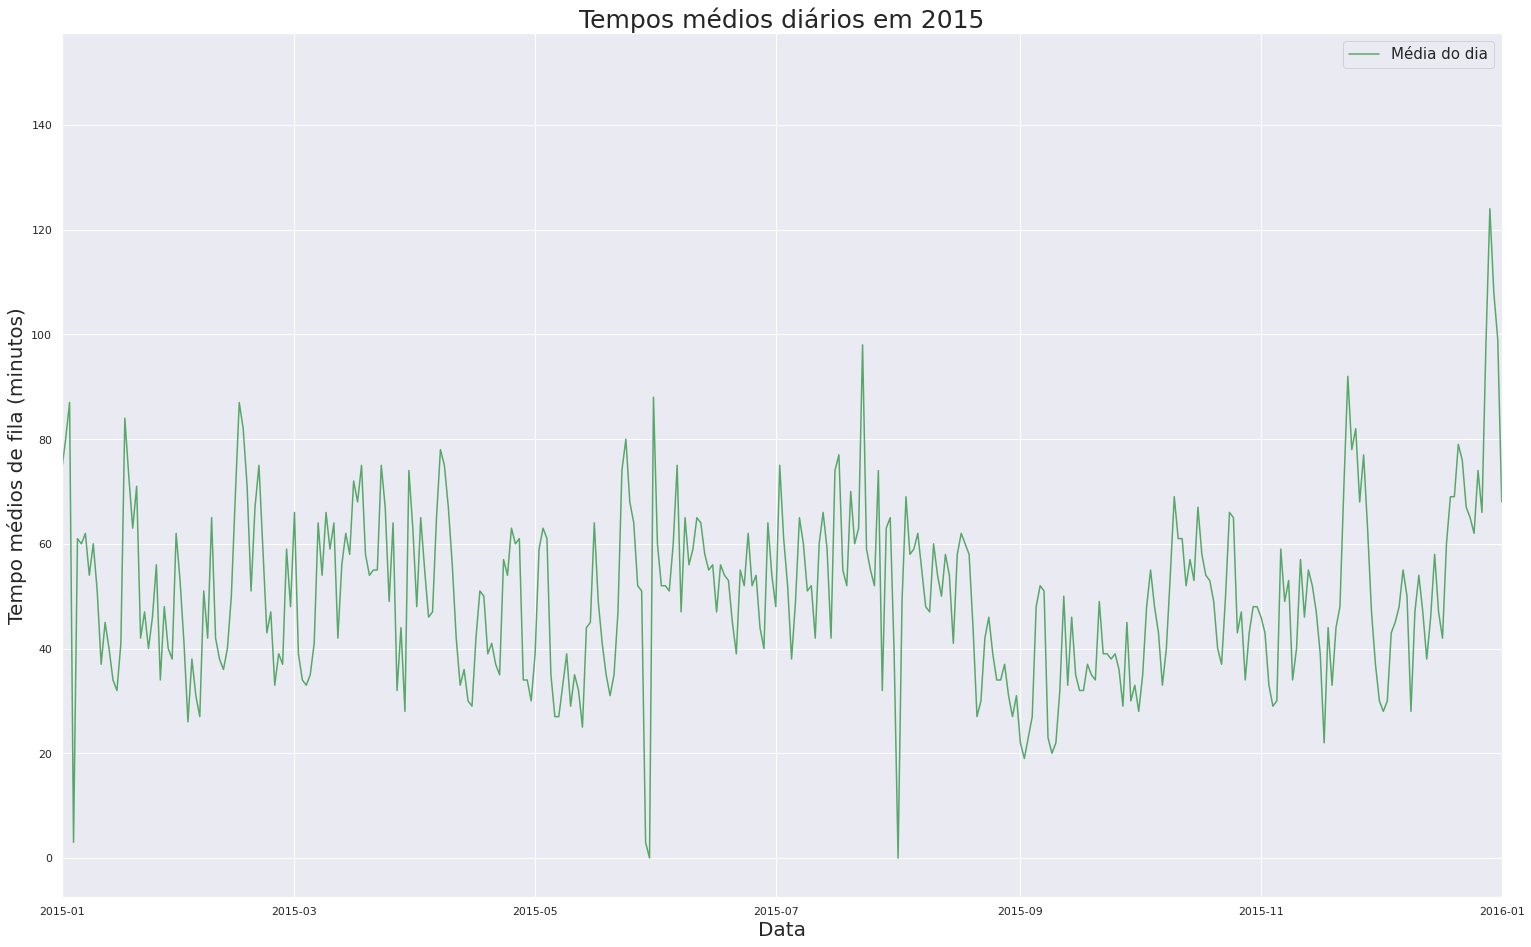

In [63]:
plota_anual(2015)

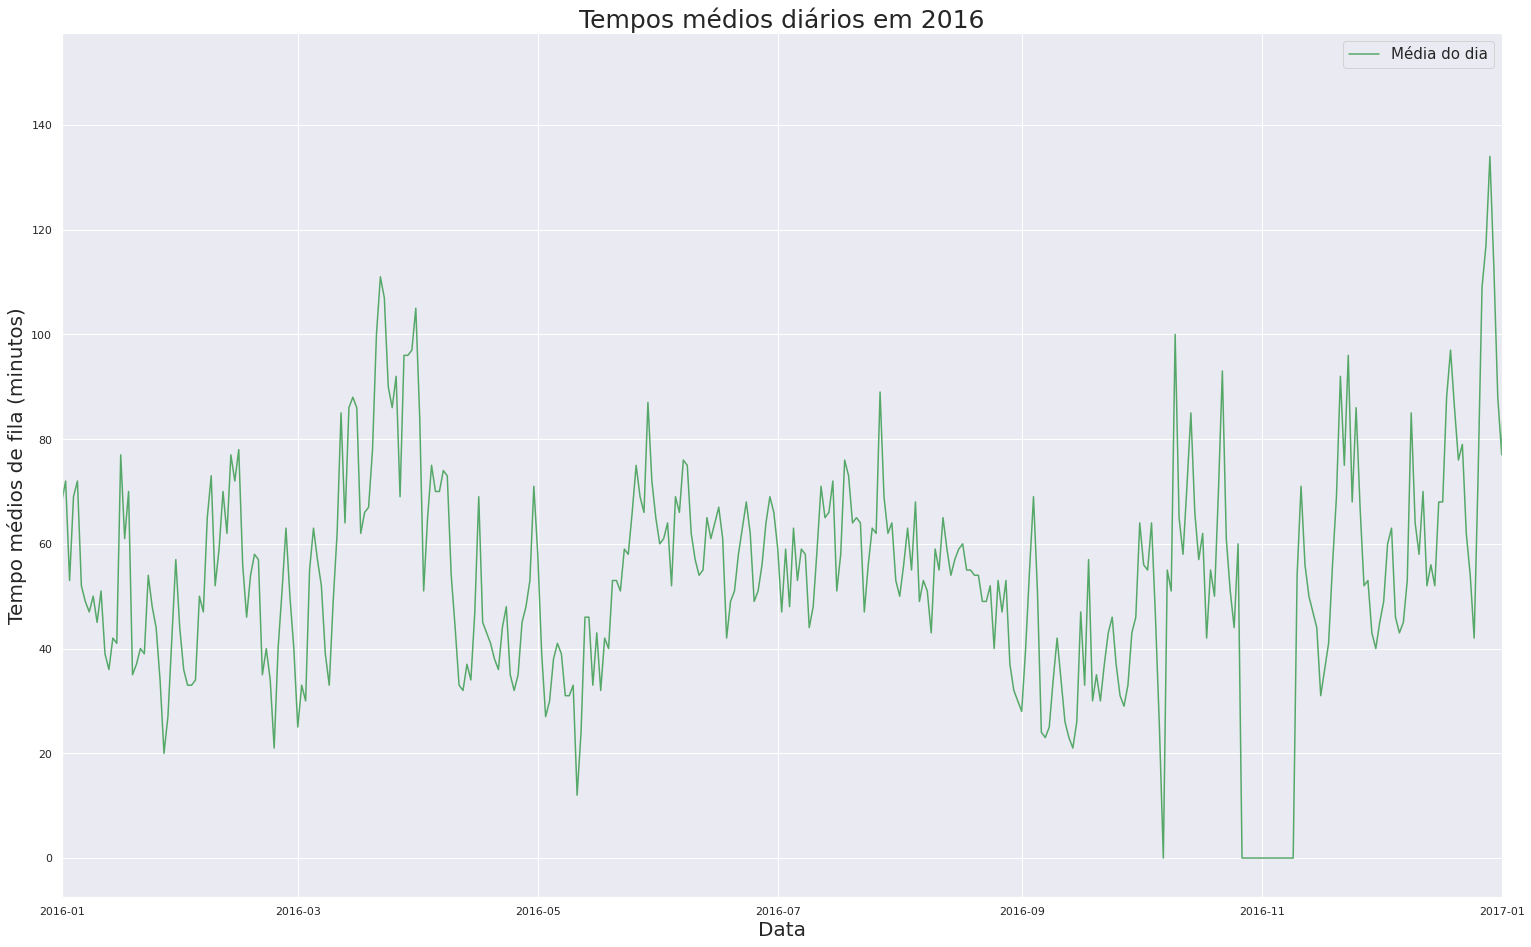

In [64]:
plota_anual(2016)

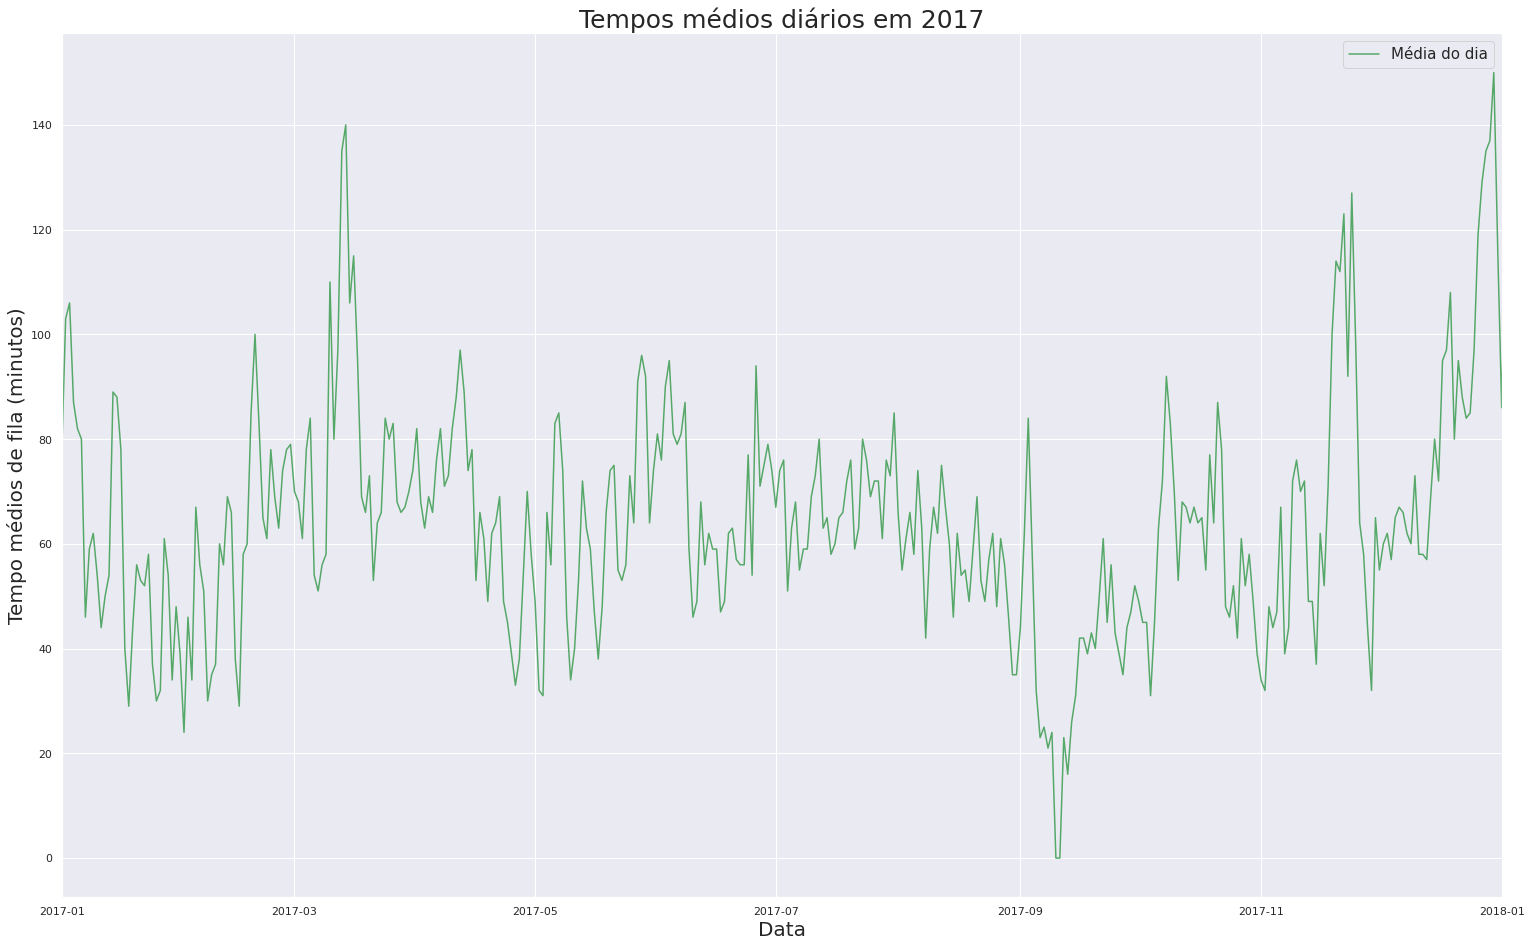

In [65]:
plota_anual(2017)

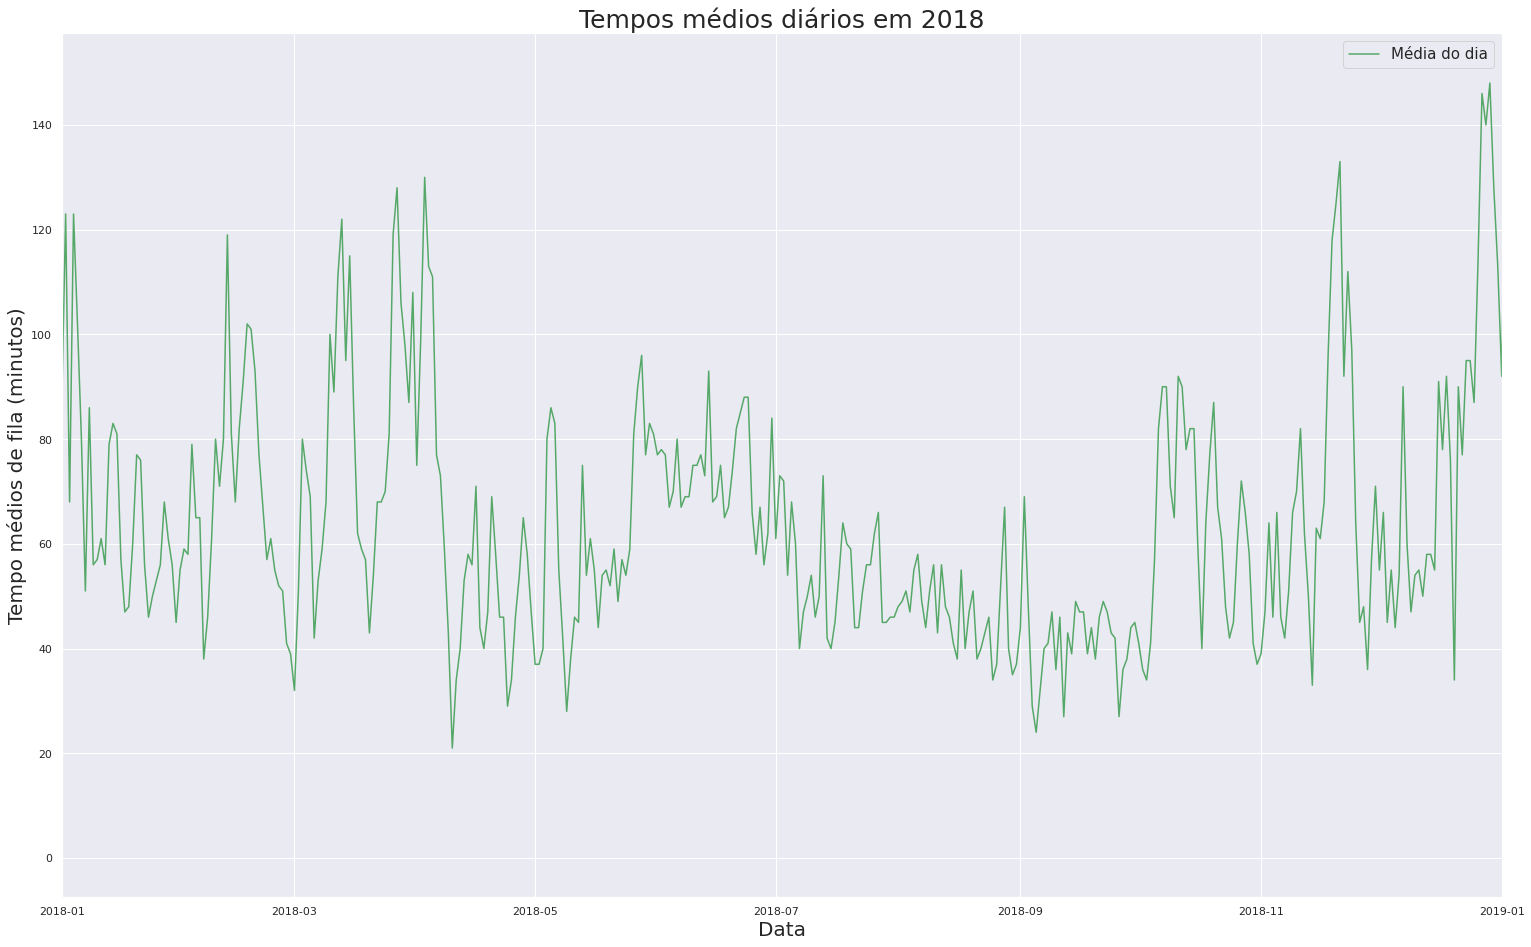

In [66]:
plota_anual(2018)

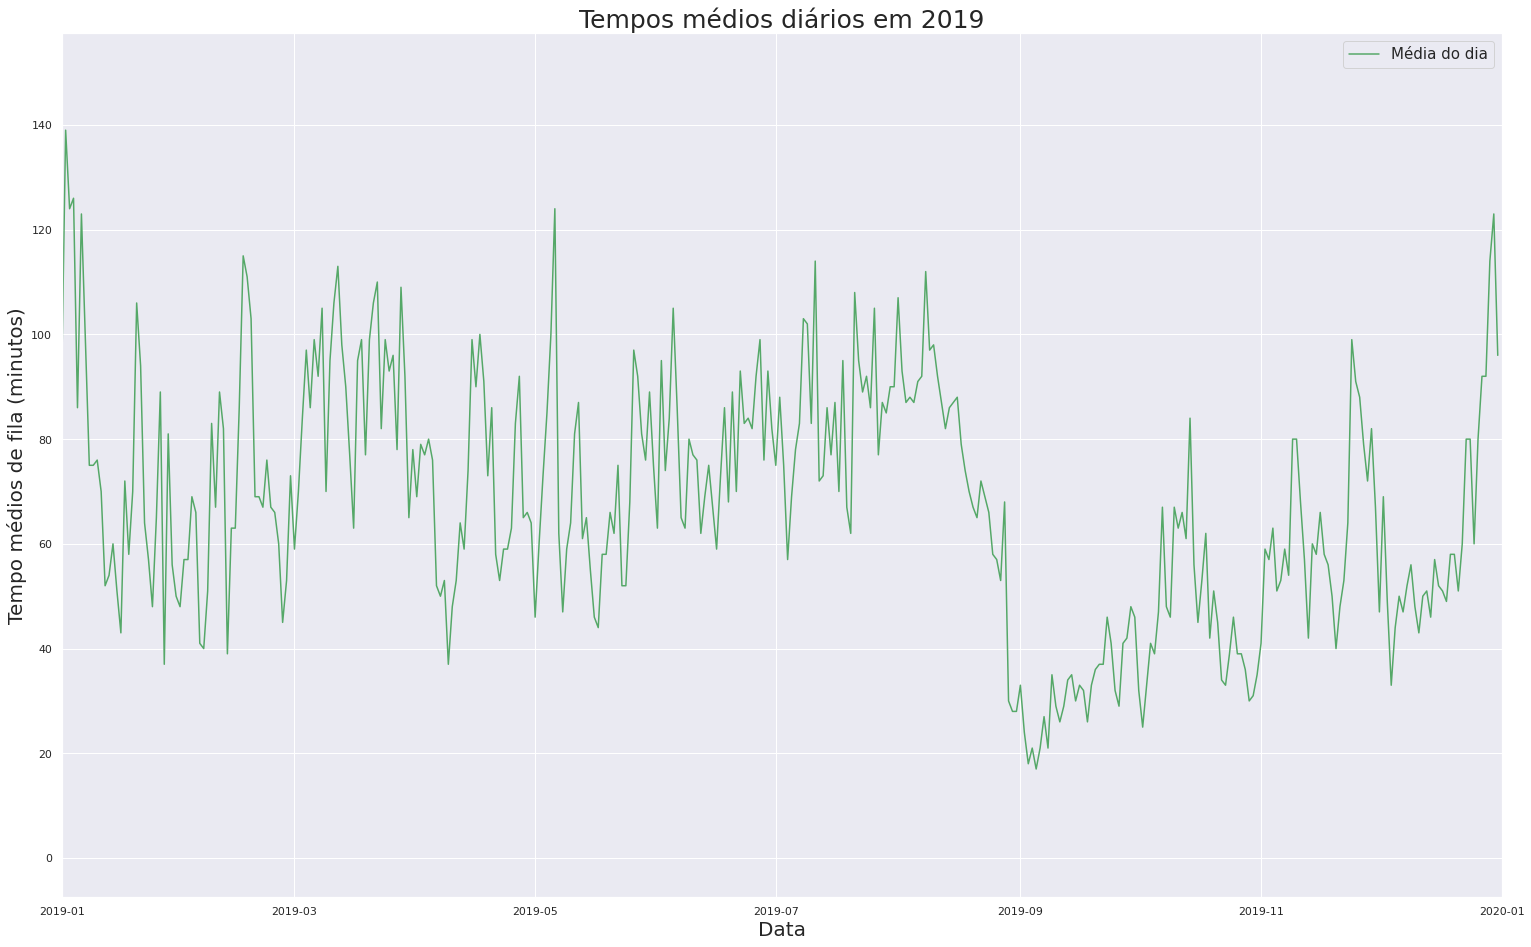

In [67]:
plota_anual(2019)

## <font color=green>4.3 Gráfico de todo o período</font>
***

In [68]:
def plot_cinco_anos():
  fig = plt.figure(figsize = (60,12))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(Medias_RocknRollerCoaster['data'], 
            Medias_RocknRollerCoaster['tempo_medio'], 
            color = 'g')


  eixo.set_title('Tempos médios diários', fontsize = 25)
  eixo.set_xlabel('Data', fontsize = 20)  
  eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)
  eixo.legend(['Média do dia'], loc = 'upper right', fontsize = 15)

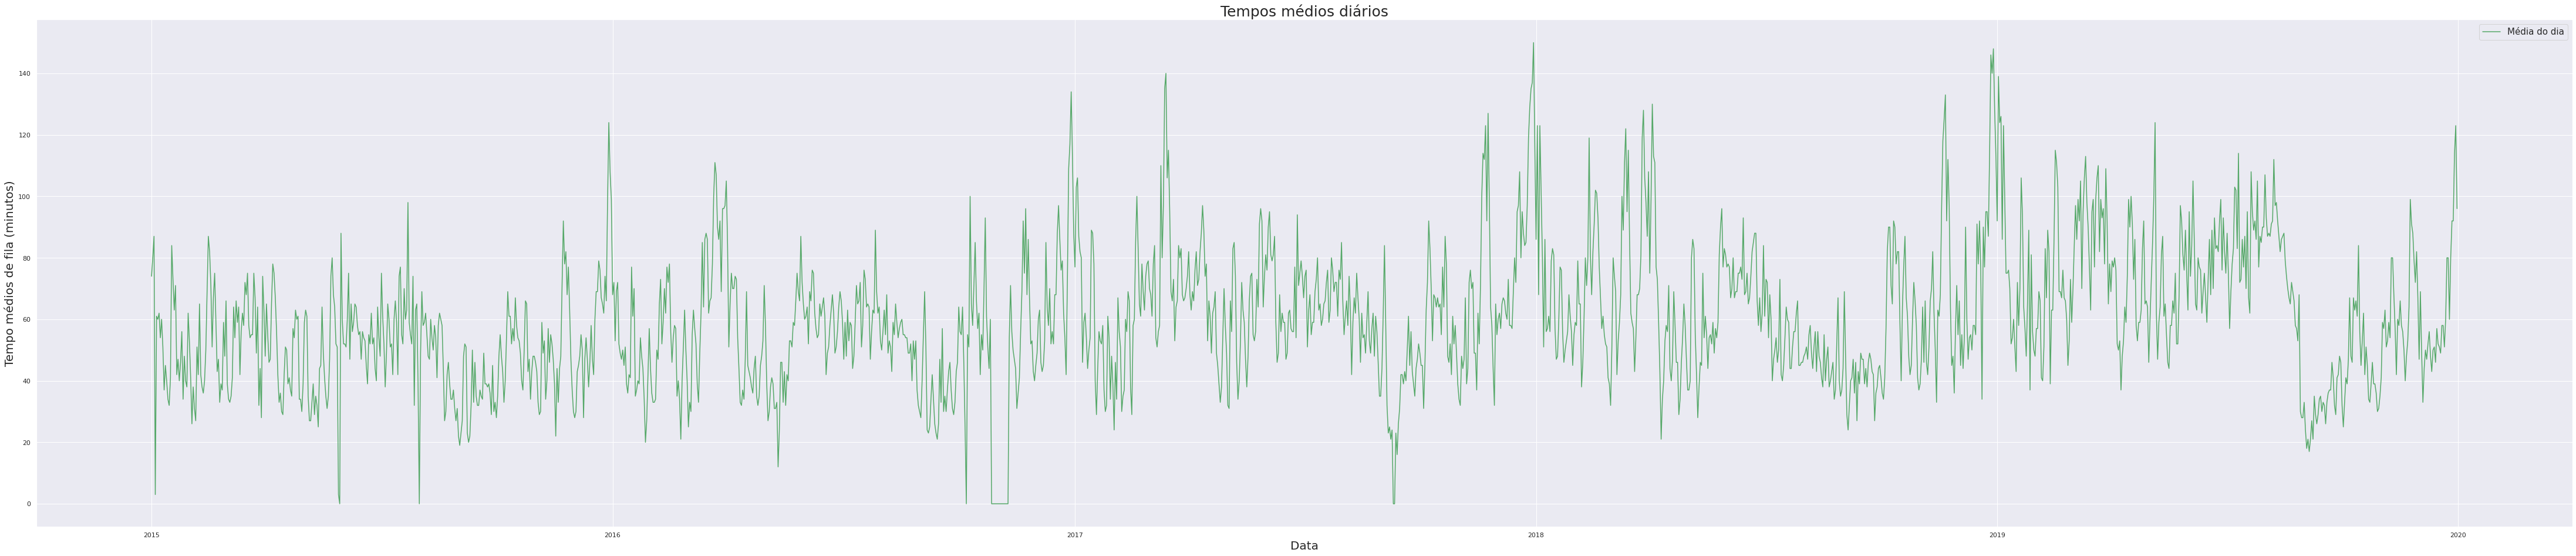

In [69]:
plot_cinco_anos()

In [70]:
RRC_15 = Medias_RocknRollerCoaster[0:365]
RRC_16 = Medias_RocknRollerCoaster[365:731]
RRC_17 = Medias_RocknRollerCoaster[731:1096]
RRC_18 = Medias_RocknRollerCoaster[1096:1461]
RRC_19 = Medias_RocknRollerCoaster[1461:]

In [71]:
RRC_19.head()

,data,tempo_medio
1461,2019-01-01,92
1462,2019-01-02,139
1463,2019-01-03,124
1464,2019-01-04,126
1465,2019-01-05,86


In [72]:
RRC_19.tail()

,data,tempo_medio
1821,2019-12-27,92
1822,2019-12-28,92
1823,2019-12-29,114
1824,2019-12-30,123
1825,2019-12-31,96


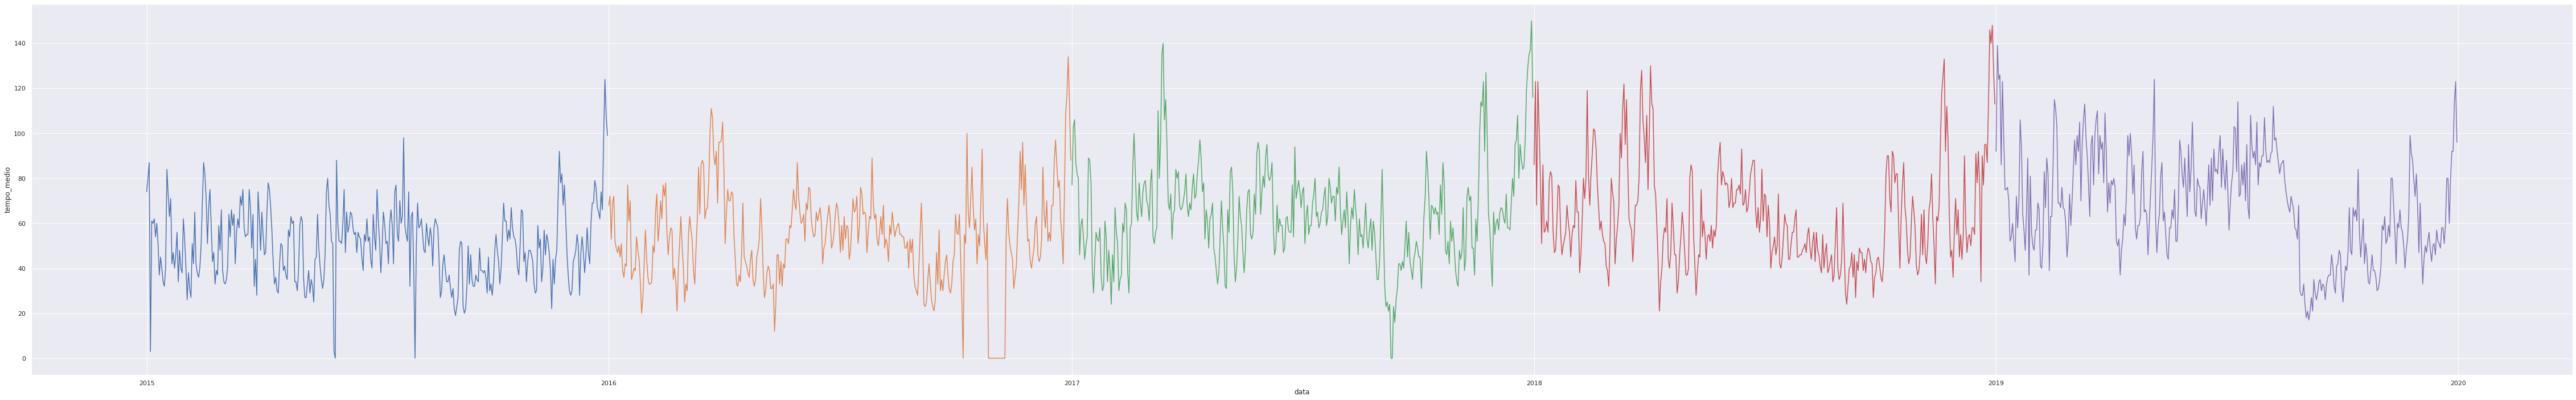

In [73]:
fig = plt.figure(figsize = (80,12))
sns.lineplot(x = 'data',
             y = 'tempo_medio',
             data = RRC_15)
sns.lineplot(x = 'data',
             y = 'tempo_medio',
             data = RRC_16)
sns.lineplot(x = 'data',
             y = 'tempo_medio',
             data = RRC_17)
sns.lineplot(x = 'data',
             y = 'tempo_medio',
             data = RRC_18)
sns.lineplot(x = 'data',
             y = 'tempo_medio',
             data = RRC_19)


Estamos agora to os dados tratatos. O próximo passo é linkar com os dados climáticos, feriados, temporadas, etc. Para isso, iremos ler um novo conjunto de dados chamado de 'metadata'.

# <font color=green>5 METADATA</font>
***

## <font color=green>5.1 Carregando o dataset</font>
***

In [74]:
metadata = pd.read_csv('https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Dados/TouringPlans/metadata.csv')

In [75]:
metadata

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWevent,WDWrace,WDWSEASON,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,MKeventN,MKevent,EPeventN,EPevent,HSeventN,HSevent,AKeventN,AKevent,HOLIDAYJ,inSession,inSession_Enrollment,inSession_wdw,inSession_dlr,inSession_sqrt_WDW,inSession_sqrt_DLR,inSession_California,inSession_DC,inSession_Central_FL,inSession_Drive1_FL,...,CapacityLostWGT_AK,EP09CAPACITY,HS20CAPACITY,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN,EPFIREWK,EPFIRET1,EPFIRET2,EPFIREN,HSPRDDAY,HSPRDDT1,HSPRDDN,HSFIREWK,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNGT,HSSHWNT1,HSSHWNT2,HSSHWNN,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,nyd,1,NaN,NaN,NaN,0,0,CHRISTMAS PEAK,73.02,59.81,66.41,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,20971646,1600,1000,2,12:00,15:30,Disney Festival of Fantasy Parade,1,22:15,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,0,NaN,NaN,NaN,3,18:30,20:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,01/02/2015,NaN,6,1,0,1,2015,CHRISTMAS,2,5,NaN,0,NaN,NaN,NaN,0,0,CHRISTMAS,78.00,60.72,69.36,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,20971646,1600,1000,2,12:00,15:30,Disney Festival of Fantasy Parade,1,22:15,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,0,NaN,NaN,NaN,3,18:30,20:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,01/03/2015,NaN,7,2,0,1,2015,CHRISTMAS,3,0,NaN,0,NaN,NaN,NaN,0,0,CHRISTMAS,83.12,67.31,75.22,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,20971646,1600,1000,2,12:00,15:30,Disney Festival of Fantasy Parade,1,22:15,NaN,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,0,NaN,NaN,NaN,2,18:30,20:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,01/04/2015,NaN,1,3,1,1,2015,CHRISTMAS,4,0,NaN,0,NaN,NaN,NaN,0,0,CHRISTMAS,83.93,67.97,75.95,NaN,0,NaN,0,NaN,0,NaN,0,NaN,67%,74%,77%,74%,74%,70%,66%,94%,68%,57%,...,20971646,1600,1000,1,15:00,NaN,Disney Festival of Fantasy Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,0,NaN,NaN,NaN,2,19:00,20:30,Fantasmic!,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,01/05/2015,NaN,2,4,1,1,2015,CHRISTMAS,5,0,NaN,0,NaN,NaN,NaN,0,0,CHRISTMAS,72.30,56.89,64.60,NaN,0,NaN,0,NaN,0,NaN,0,NaN,67%,74%,77%,74%,74%,70%,66%,94%,68%,57%,...,20971646,1600,1000,1,15:00,NaN,Disney Festival of Fantasy Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,NaN,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,0,NaN,NaN,NaN,2,19:00,20:30,Fantasmic!,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,12/26/2019,NaN,5,359,51,12,2019,CHRISTMAS,2,5,NaN,0,peak,NaN,wdwhol,1,0,CHRISTMAS PEAK,68.23,58.83,63.53,NaN,0,ephol,1,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21791222,2400,1500,2,12:00,15:00,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,1,22:00,NaN,Minnie’s Wonderful Christmastime Fireworks,1,21:30,NaN,Epcot Forever,0,NaN,NaN,1,22:00,NaN,"Jingle Bell, Jingle BAM!",3,21:00,21:35,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,20:00,Rivers of Light
2128,12/27/2019,NaN,6,360,51,12,2019,CHRISTMAS PEAK,3,5,NaN,0,peak,NaN,wdwhol,1,0,CHRISTMAS PEAK,58.31,51.12,54.72,NaN,0,ephol,1,NaN,0,NaN,0,NaN,0%,0%,0%,0%

Notamos que o dataset traz uma série de informações para utilizarmos. Sendo elas a temporada, temperaturas mínima, máxima e média de cada dia, a ocorrência de eventos especiais (maratonas e festivais), shows noturnos, entre outros.

## <font color=green>5.2 Ajustando os dados</font>
***

#### <font color='red'>IMPORTANTE</font>
***
Podemos notar que o dataset 'metadata' possui linhas (rows) a mais do que obtivemos nas médias acima!


Somando todos os dias dos 5 anos:

365 + 366 + 365 + 365 + 365 = 1826 dias

No dataset, temos 2132 linhas, sobrando 306 dias.

Vamos agora identificar onde estãos os dias sobrando.

In [76]:
m2015 = metadata.YEAR == 2015
m2016 = metadata.YEAR == 2016
m2017 = metadata.YEAR == 2017
m2018 = metadata.YEAR == 2018
m2019 = metadata.YEAR == 2019

In [77]:
data2015 = metadata[m2015]
data2016 = metadata[m2016]
data2017 = metadata[m2017]
data2018 = metadata[m2018]
data2019 = metadata[m2019]

In [78]:
data2015.shape

(365, 190)

In [79]:
data2016.shape

(366, 190)

In [80]:
data2017.shape

(486, 190)

In [81]:
data2018.shape

(551, 190)

In [82]:
data2019.shape

(364, 190)

Podemos ver que as linhas de sobra estão em 2017 e 2018. Agora iremos procurar em quais meses estão.

In [83]:
for i in range(1,13):
  mmes17 = data2017.MONTHOFYEAR == i
  mes17 = data2017[mmes17]
  print('Mês : ', i, mes17.shape)

Mês :  1 (31, 190)
Mês :  2 (28, 190)
Mês :  3 (31, 190)
Mês :  4 (30, 190)
Mês :  5 (31, 190)
Mês :  6 (30, 190)
Mês :  7 (31, 190)
Mês :  8 (31, 190)
Mês :  9 (30, 190)
Mês :  10 (31, 190)
Mês :  11 (30, 190)
Mês :  12 (152, 190)


In [84]:
for i in range(1,13):
  mmes18 = data2018.MONTHOFYEAR == i
  mes18 = data2018[mmes18]
  print('Mês : ', i, mes18.shape)

Mês :  1 (217, 190)
Mês :  2 (28, 190)
Mês :  3 (31, 190)
Mês :  4 (30, 190)
Mês :  5 (31, 190)
Mês :  6 (30, 190)
Mês :  7 (31, 190)
Mês :  8 (31, 190)
Mês :  9 (30, 190)
Mês :  10 (31, 190)
Mês :  11 (30, 190)
Mês :  12 (31, 190)


Apenas dois meses estão errados: Dezembro de 2017 e Janeiro de 2018.

In [85]:
data2017.tail(10)

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWevent,WDWrace,WDWSEASON,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,MKeventN,MKevent,EPeventN,EPevent,HSeventN,HSevent,AKeventN,AKevent,HOLIDAYJ,inSession,inSession_Enrollment,inSession_wdw,inSession_dlr,inSession_sqrt_WDW,inSession_sqrt_DLR,inSession_California,inSession_DC,inSession_Central_FL,inSession_Drive1_FL,...,CapacityLostWGT_AK,EP09CAPACITY,HS20CAPACITY,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN,EPFIREWK,EPFIRET1,EPFIRET2,EPFIREN,HSPRDDAY,HSPRDDT1,HSPRDDN,HSFIREWK,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNGT,HSSHWNT1,HSSHWNT2,HSSHWNN,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
1207,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:50,Fantasy In The Sky Fireworks,2,18:30,23:40,IllumiNations: Reflections of Earth,0,NaN,NaN,2,20:00,0:00,"Jingle Bell, Jingle BAM!",2,19:00,21:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,19:15,20:45,Rivers of Light
1208,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:50,Fantasy In The Sky Fireworks,2,18:30,23:40,IllumiNations: Reflections of Earth,0,NaN,NaN,2,20:00,0:00,"Jingle Bell, Jingle BAM!",2,19:00,21:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,19:15,20:45,Rivers of Light
1209,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:50,Fantasy In The Sky Fireworks,2,18:30,23:40,IllumiNations: Reflections of Earth,0,NaN,NaN,2,20:00,0:00,"Jingle Bell, Jingle BAM!",2,19:00,21:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,19:15,20:45,Rivers of Light
1210,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:50,Fantasy In The Sky Fireworks,2,18:30,23:40,IllumiNations: Reflections of Earth,0,NaN,NaN,2,20:00,0:00,"Jingle Bell, Jingle BAM!",2,19:00,21:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,19:15,20:45,Rivers of Light
1211,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:50,Fantasy In The Sky Fireworks,2,18:30,23:40,IllumiNations: Reflections of Earth,0,NaN,NaN,2,20:00,0:00,"Jingle Bell, Jingle BAM!",2,19:00,21:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,19:15,20:45,Rivers of Light
1212,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:50,Fantasy In The Sky Fireworks,2,18:30,23:40,IllumiNations: Reflections of Earth,0,NaN,NaN,2,20:00,0:00,"Jingle Bell, Jingle BAM!",2,19:00,21:00,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,19:15,20:45,Rivers of Light
1213,12/31/2017,peak,1,364,53,12,2017,CHRISTMAS PEAK,0,0,nye,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,69.28,44.68,56.98,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21879447,2400,1500,2,12:00,15:30,Mickey's Once Upon a Christmastime Parade,0,NaN,NaN,NaN,2,18:30,23:

In [86]:
data2018.head(10)

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,HOLIDAYN,HOLIDAY,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWevent,WDWrace,WDWSEASON,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,MKeventN,MKevent,EPeventN,EPevent,HSeventN,HSevent,AKeventN,AKevent,HOLIDAYJ,inSession,inSession_Enrollment,inSession_wdw,inSession_dlr,inSession_sqrt_WDW,inSession_sqrt_DLR,inSession_California,inSession_DC,inSession_Central_FL,inSession_Drive1_FL,...,CapacityLostWGT_AK,EP09CAPACITY,HS20CAPACITY,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN,EPFIREWK,EPFIRET1,EPFIRET2,EPFIREN,HSPRDDAY,HSPRDDT1,HSPRDDN,HSFIREWK,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNGT,HSSHWNT1,HSSHWNT2,HSSHWNN,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
1217,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,19:45,Rivers of Light
1218,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,19:45,Rivers of Light
1219,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,19:45,Rivers of Light
1220,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,19:45,Rivers of Light
1221,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,19:45,Rivers of Light
1222,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN,NaN,NaN,2,18:30,19:45,Rivers of Light
1223,01/01/2018,peak,2,0,0,1,2018,CHRISTMAS PEAK,0,5,nyd,1,peak,NaN,NaN,0,0,CHRISTMAS PEAK,58.63,42.49,50.56,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,21884447,2400,1500,1,15:00,NaN,Disney Festival of Fantasy Parade,0,NaN,NaN,NaN,1,21:00,NaN,Happily Ever After,1,21:00,NaN,IllumiNations: Reflections of Earth,0,NaN,NaN,1,20:00,NaN,Star Wars: A Galactic Spectacular,1,19:00,NaN,Fantasmic!,1,0,NaN,NaN

Como podemos observar, os dias 31/12/2017 e 01/01/2018 estão repetidos várias vezes. Não só a data como todos os outros dados da linha. Para resolver isso, basta apenas usarmos a função 'drop_duplicates()' do Pandas.

In [87]:
metadata = metadata.drop_duplicates()

In [88]:
metadata.reset_index(inplace = True)

# <font color=green>6 UNINDO METADATA COM MÉDIAS DOS TEMPOS DE FILA</font>
***

Agora estamos com o dataset 'metadata' *quase* certo. Porém, podemos observar que o dia 31/12/2019 não está no conjunto. Neste caso, temos duas alternativas:

1: Excluir o dia dos tempos médios de fila;

2: Acrescentar o dia no 'metadata', inferindo os valores das colunas;

Iremos pela segunda opção.

## <font color=green>6.1 Unindo os dados</font>
***

Iremos considerar, inicialmente, a data, dia da semana, temporada, feriado, proximidade dos feriado, temperaturas mínima, média e máxima.

In [89]:
dados = pd.DataFrame(index = range(0,len(Medias_RocknRollerCoaster)), 
                     columns = ['Data', 
                                'Mes',
                                'Dia_da_semana', 
                                'Temporada', 
                                'Feriado', 
                                'Proximidade_de_feriado', 
                                'Temperatura_maxima', 
                                'Temperatura_minima', 
                                'Temperatura_media', 
                                'TEMPO_MEDIO_DE_FILA'])

dados.Data = Medias_RocknRollerCoaster.data
dados.Mes = metadata.MONTHOFYEAR
dados.Dia_da_semana = metadata.DAYOFWEEK
dados.Temporada = metadata.SEASON
dados.Feriado = metadata.HOLIDAY
dados.Proximidade_de_feriado = metadata.HOLIDAYPX
dados.Temperatura_maxima = metadata.WDWMAXTEMP
dados.Temperatura_minima = metadata.WDWMINTEMP
dados.Temperatura_media = metadata.WDWMEANTEMP
dados.TEMPO_MEDIO_DE_FILA = Medias_RocknRollerCoaster.tempo_medio

In [90]:
dados

,Data,Mes,Dia_da_semana,Temporada,Feriado,Proximidade_de_feriado,Temperatura_maxima,Temperatura_minima,Temperatura_media,TEMPO_MEDIO_DE_FILA
0,2015-01-01,1.0,5.0,CHRISTMAS PEAK,1.0,0.0,73.02,59.81,66.41,74
1,2015-01-02,1.0,6.0,CHRISTMAS,0.0,2.0,78.00,60.72,69.36,80
2,2015-01-03,1.0,7.0,CHRISTMAS,0.0,3.0,83.12,67.31,75.22,87
3,2015-01-04,1.0,1.0,CHRISTMAS,0.0,4.0,83.93,67.97,75.95,3
4,2015-01-05,1.0,2.0,CHRISTMAS,0.0,5.0,72.30,56.89,64.60,61
...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,12.0,6.0,CHRISTMAS PEAK,0.0,3.0,58.31,51.12,54.72,92
1822,2019-12-28,12.0,7.0,CHRISTMAS PEAK,0.0,4.0,64.29,49.19,56.74,92
1823,2019-12-29,12.0,1.0,CHRISTMAS PEAK,0.0,3.0,64.29,49.19,56.74,114
1824,2019-12-30,12.0,2.0,CHRISTMAS PEAK,0.0,2.0,64.29,49.19,56.74,123


Percebemos que a última linha possui diversos 'NaN', isso por que, conforme explicado anteriormente, o DataSet 'metadata' terminava no dia 30/12/2019.

In [91]:
dados.Mes[1825] = dados.Mes[1824]
dados.Dia_da_semana[1825] = dados.Dia_da_semana[1824] + 1
dados.Temporada[1825] = dados.Temporada[1824]
dados.Feriado[1825] = 1
dados.Proximidade_de_feriado[1825] = 0
dados.Temperatura_maxima[1825] = dados.Temperatura_maxima[1824]
dados.Temperatura_minima[1825] = dados.Temperatura_minima[1824]
dados.Temperatura_media[1825] = dados.Temperatura_media[1824]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [92]:
dados

,Data,Mes,Dia_da_semana,Temporada,Feriado,Proximidade_de_feriado,Temperatura_maxima,Temperatura_minima,Temperatura_media,TEMPO_MEDIO_DE_FILA
0,2015-01-01,1.0,5.0,CHRISTMAS PEAK,1.0,0.0,73.02,59.81,66.41,74
1,2015-01-02,1.0,6.0,CHRISTMAS,0.0,2.0,78.00,60.72,69.36,80
2,2015-01-03,1.0,7.0,CHRISTMAS,0.0,3.0,83.12,67.31,75.22,87
3,2015-01-04,1.0,1.0,CHRISTMAS,0.0,4.0,83.93,67.97,75.95,3
4,2015-01-05,1.0,2.0,CHRISTMAS,0.0,5.0,72.30,56.89,64.60,61
...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,12.0,6.0,CHRISTMAS PEAK,0.0,3.0,58.31,51.12,54.72,92
1822,2019-12-28,12.0,7.0,CHRISTMAS PEAK,0.0,4.0,64.29,49.19,56.74,92
1823,2019-12-29,12.0,1.0,CHRISTMAS PEAK,0.0,3.0,64.29,49.19,56.74,114
1824,2019-12-30,12.0,2.0,CHRISTMAS PEAK,0.0,2.0,64.29,49.19,56.74,123


Para ficar mais agradável ao leitor, iremos traduzir os nomes das temporadas, meses e dos dias da semana:

In [93]:
dia_da_semana = {1: '1 - Domingo',
                 2: '2 - Segunda-Feira',
                 3: '3 - Terça-Feira',
                 4: '4 - Quarta-Feira',
                 5: '5 - Quinta-Feira',
                 6: '6 - Sexta-Feira',
                 7: '7 - Sábado'}

mes = {1: '01 - Janeiro',
       2: '02 - Fevereiro',
       3: '03 - Março',
       4: '04 - Abril',
       5: '05 - Maio',
       6: '06 - Junho',
       7: '07 - Julho',
       8: '08 - Agosto',
       9: '09 - Setembro',
       10: '10 - Outubro',
       11: '11 - Novembro',
       12: '12 - Dezembro'}

temporadas = {'CHRISTMAS PEAK': 'Pico de Natal',
              'CHRISTMAS': 'Natal',
              'WINTER': 'Inverno',
              'MARTIN LUTHER KING JUNIOR DAY': 'Dia de Martin Luther King Jr.',
              'PRESIDENTS WEEK': 'Semana dos Presidentes',
              'SPRING': 'Primavera',
              'EASTER': 'Páscoa',
              'MEMORIAL DAY': 'Memorial Day',
              'SUMMER BREAK': 'Férias de Verão',
              'JULY 4TH': 'Dia da Independência',
              'SEPTEMBER LOW': 'Baixa Temporada de Setembro',
              'FALL': 'Outono',
              'COLUMBUS DAY': 'Columbus Day',
              'HALLOWEEN': 'Halloween',
              'JERSEY WEEK': 'Jersey Week',
              'THANKSGIVING': 'Ação de Graças',
              'MARDI GRAS': 'Carnaval'}

In [94]:
for i in range(0,len(dados)):
  n_mes = dados.Mes[i]
  dados.Mes[i] = mes[n_mes]

  n_dia = dados.Dia_da_semana[i]
  dados.Dia_da_semana[i] = dia_da_semana[n_dia]

  n_temporada = dados.Temporada[i]
  dados.Temporada[i] = temporadas[n_temporada]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [95]:
dados

,Data,Mes,Dia_da_semana,Temporada,Feriado,Proximidade_de_feriado,Temperatura_maxima,Temperatura_minima,Temperatura_media,TEMPO_MEDIO_DE_FILA
0,2015-01-01,01 - Janeiro,5 - Quinta-Feira,Pico de Natal,1.0,0.0,73.02,59.81,66.41,74
1,2015-01-02,01 - Janeiro,6 - Sexta-Feira,Natal,0.0,2.0,78.00,60.72,69.36,80
2,2015-01-03,01 - Janeiro,7 - Sábado,Natal,0.0,3.0,83.12,67.31,75.22,87
3,2015-01-04,01 - Janeiro,1 - Domingo,Natal,0.0,4.0,83.93,67.97,75.95,3
4,2015-01-05,01 - Janeiro,2 - Segunda-Feira,Natal,0.0,5.0,72.30,56.89,64.60,61
...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,12 - Dezembro,6 - Sexta-Feira,Pico de Natal,0.0,3.0,58.31,51.12,54.72,92
1822,2019-12-28,12 - Dezembro,7 - Sábado,Pico de Natal,0.0,4.0,64.29,49.19,56.74,92
1823,2019-12-29,12 - Dezembro,1 - Domingo,Pico de Natal,0.0,3.0,64.29,49.19,56.74,114
1824,2019-12-30,12 - Dezembro,2 - Segunda-Feira,Pico de Natal,0.0,2.0,64.29,49.19,56.74,123


Observamos que as temperaturas estão em graus Fahrenheit, medida usada nos Estados Unidos. Para termos uma noção melhor, transformaremos as temperaturas em Celsius. Porém, antes, iremos verificar se existe alguma lacuna nos dados de temperatura:

In [96]:
dados.describe()

,Feriado,Proximidade_de_feriado,Temperatura_maxima,Temperatura_minima,Temperatura_media,TEMPO_MEDIO_DE_FILA
count,1826.000000,1826.000000,1821.000000,1820.000000,1820.000000,1826.000000
mean,0.104600,7.785323,82.269616,65.477670,73.877687,59.863089
std,0.306121,6.784343,8.343153,10.246733,8.990035,22.284435
min,0.000000,0.000000,51.110000,27.480000,39.740000,0.000000
25%,0.000000,3.000000,78.240000,59.300000,68.850000,45.000000
50%,0.000000,6.000000,83.740000,67.590000,75.780000,58.000000
75%,0.000000,10.000000,88.890000,74.230000,81.270000,72.000000
max,1.000000,33.000000,96.130000,80.220000,87.490000,150.000000


O dataset tem, ao todo, 1825 linhas. Ou seja, deveríamos ter o mesmo número de dados para as temperaturas, na linha 'count' acima. Podemos aplicar o método "fillna" da biblioteca Pandas para preencher essas lacunas.

In [97]:
dados['Temperatura_maxima'] = dados['Temperatura_maxima'].fillna(method = 'ffill')
dados['Temperatura_minima'] = dados['Temperatura_minima'].fillna(method = 'ffill')
dados['Temperatura_media'] = dados['Temperatura_media'].fillna(method = 'ffill')

In [98]:
dados.describe()

,Feriado,Proximidade_de_feriado,Temperatura_maxima,Temperatura_minima,Temperatura_media,TEMPO_MEDIO_DE_FILA
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,0.104600,7.785323,82.271627,65.466813,73.871862,59.863089
std,0.306121,6.784343,8.340580,10.235738,8.981786,22.284435
min,0.000000,0.000000,51.110000,27.480000,39.740000,0.000000
25%,0.000000,3.000000,78.245000,59.300000,68.850000,45.000000
50%,0.000000,6.000000,83.725000,67.565000,75.765000,58.000000
75%,0.000000,10.000000,88.905000,74.220000,81.270000,72.000000
max,1.000000,33.000000,96.130000,80.220000,87.490000,150.000000


## <font color=green>6.2 Transformação dos dados de temperatura</font>
***

In [99]:
dados.Temperatura_maxima = np.round((dados.Temperatura_maxima - 32) * (5 / 9))
dados.Temperatura_minima = np.round((dados.Temperatura_minima - 32) * (5 / 9))
dados.Temperatura_media = np.round((dados.Temperatura_media - 32) * (5 / 9))

In [100]:
dados

,Data,Mes,Dia_da_semana,Temporada,Feriado,Proximidade_de_feriado,Temperatura_maxima,Temperatura_minima,Temperatura_media,TEMPO_MEDIO_DE_FILA
0,2015-01-01,01 - Janeiro,5 - Quinta-Feira,Pico de Natal,1.0,0.0,23.0,15.0,19.0,74
1,2015-01-02,01 - Janeiro,6 - Sexta-Feira,Natal,0.0,2.0,26.0,16.0,21.0,80
2,2015-01-03,01 - Janeiro,7 - Sábado,Natal,0.0,3.0,28.0,20.0,24.0,87
3,2015-01-04,01 - Janeiro,1 - Domingo,Natal,0.0,4.0,29.0,20.0,24.0,3
4,2015-01-05,01 - Janeiro,2 - Segunda-Feira,Natal,0.0,5.0,22.0,14.0,18.0,61
...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,12 - Dezembro,6 - Sexta-Feira,Pico de Natal,0.0,3.0,15.0,11.0,13.0,92
1822,2019-12-28,12 - Dezembro,7 - Sábado,Pico de Natal,0.0,4.0,18.0,10.0,14.0,92
1823,2019-12-29,12 - Dezembro,1 - Domingo,Pico de Natal,0.0,3.0,18.0,10.0,14.0,114
1824,2019-12-30,12 - Dezembro,2 - Segunda-Feira,Pico de Natal,0.0,2.0,18.0,10.0,14.0,123


# <font color=green>7 GRÁFICOS DE DISPERSÃO ENTRE AS VARIÁVEIS E O TEMPO MÉDIO DE FILA</font>
***

Nas análises abaixo, iremos usar a noção de quartis:

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem a distribuição em quatro partes iguais. 

O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima, enquanto que o terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima. Já Q2 é a mediana, deixa 50% das observações abaixo e 50% das observações acima.

## <font color=green>7.1 Tempo de fila X Mês</font>
***

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

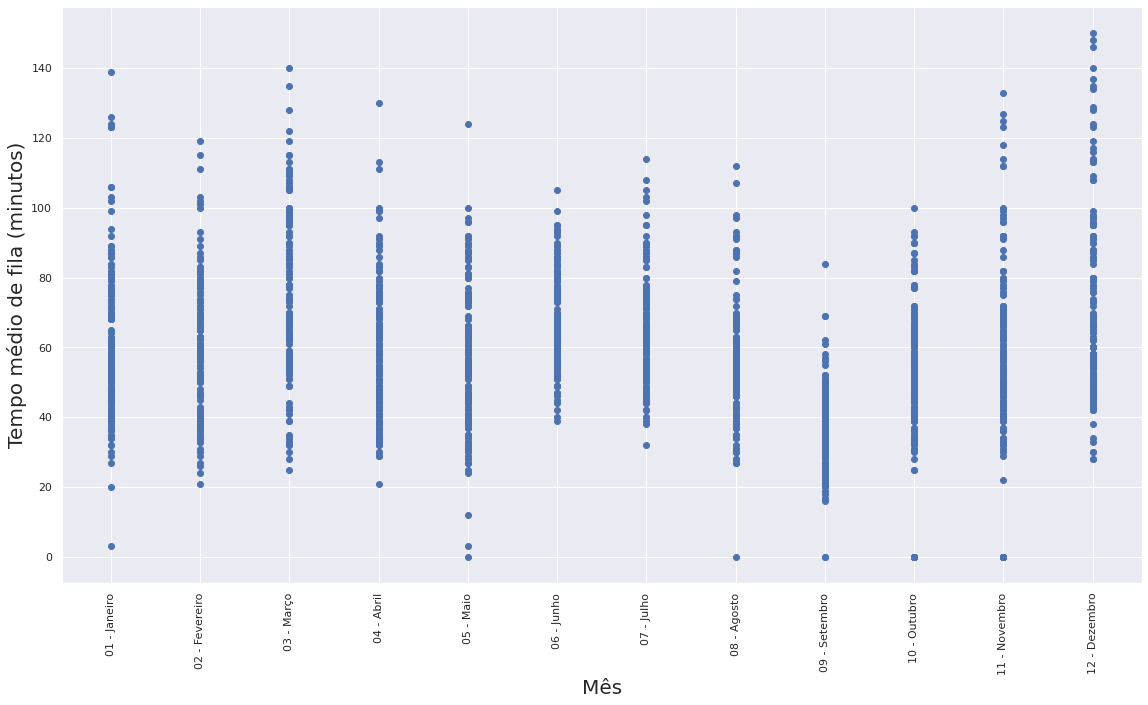

In [101]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Mes'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Mês', fontsize = 20)  
eixo.set_ylabel('Tempo médio de fila (minutos)', fontsize = 20)
plt.xticks(rotation = 90)

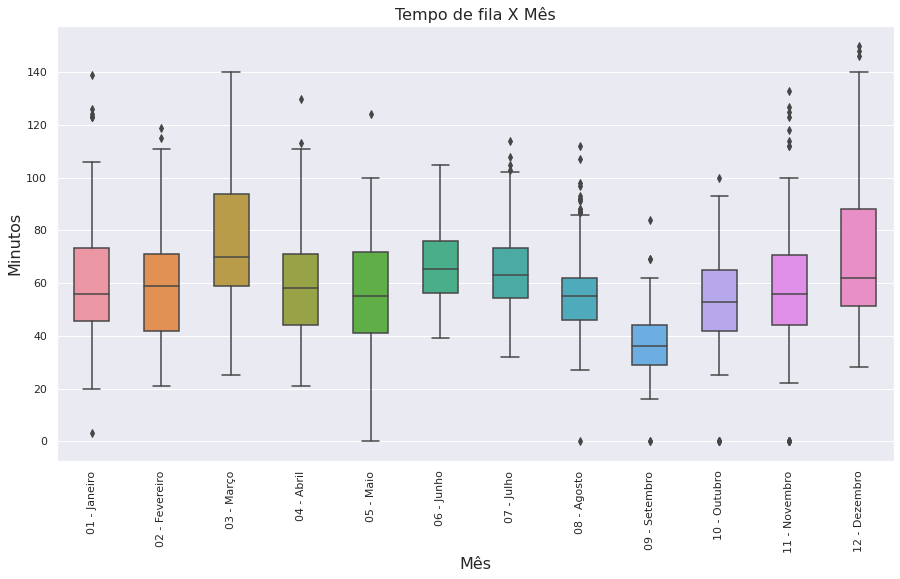

In [102]:
ax = sns.boxplot(y = 'TEMPO_MEDIO_DE_FILA', x = 'Mes', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(15, 8)
ax.set_title('Tempo de fila X Mês', fontsize = 16)
ax.set_ylabel('Minutos', fontsize = 16)
ax.set_xlabel('Mês', fontsize = 16)
plt.xticks(rotation=90)
ax

Algumas conlusões:

1. Em todos os meses ocorreram dias de pouca ou muita fila. O que pesa será a frequência com que ocorrem as filas maiores ou menores;

2. Na maior parte dos meses, os tempos de fila se concentraram em torno de 60 minutos, com este tempo próximo de Q2, acima do Q1 e abaixo do Q3. Apenas em setembro que o tempo de 60 minutos está acima do Q3, quase sendo um *outlier*, o que indica este como o mês menos movimentado;

3. Março e Dezembro, aparentemente, são os meses de maior movimento, em que apresentam os maiores valores de Q2 e Q3, ou ainda *outliers* acima de 140 minutos, no caso de Dezembro.

4. Junho e Julho não apresentam os maiores movimentos, mas também não são meses "vazios", visto que o minuto 60 está entre Q1 e Q2. Logo, a ocorrência de filas acima de 60 minutos é expressiva.

## <font color=green>7.1 Tempo de fila X Dia da semana</font>
***

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

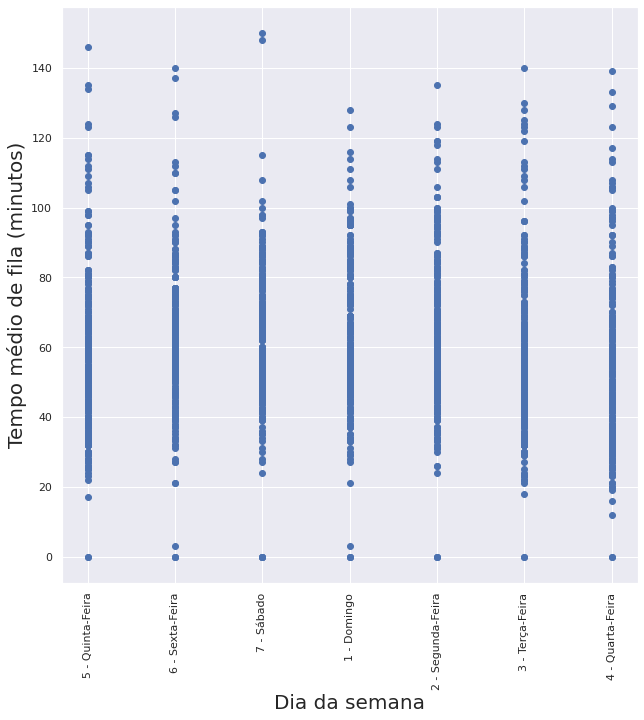

In [103]:
fig = plt.figure(figsize = (8,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Dia_da_semana'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Dia da semana', fontsize = 20)  
eixo.set_ylabel('Tempo médio de fila (minutos)', fontsize = 20)
plt.xticks(rotation = 90)

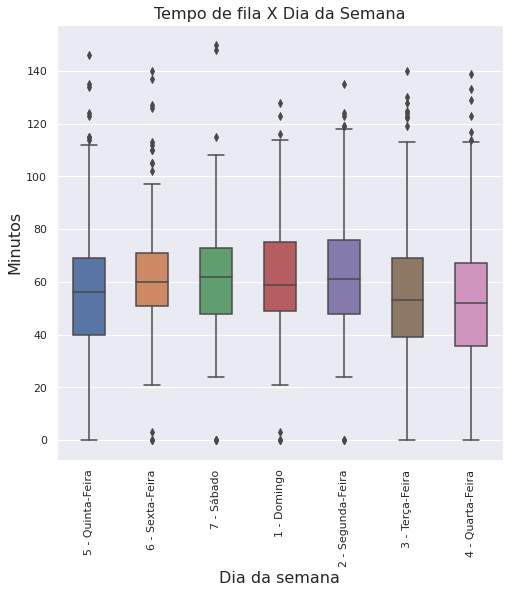

In [104]:
ax = sns.boxplot(y = 'TEMPO_MEDIO_DE_FILA', x = 'Dia_da_semana', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(8, 8)
ax.set_title('Tempo de fila X Dia da Semana', fontsize = 16)
ax.set_ylabel('Minutos', fontsize = 16)
ax.set_xlabel('Dia da semana', fontsize = 16)
plt.xticks(rotation=90)
ax

Algumas conclusões:

1. O dia da semana não influencia, aparentemente, tanto no tempo de fila, isoladamente, pois quase todos os dias, os tempos médios se concentram em torno de 60 minutos, porém apresentam desvios significativos. Provavelmente, combinando o dia da semana com outras variáveis, considerando a sazonalidade, poderemos notar alguma real influência.

## <font color=green>7.3 Tempo de fila X Temporada</font>
***

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

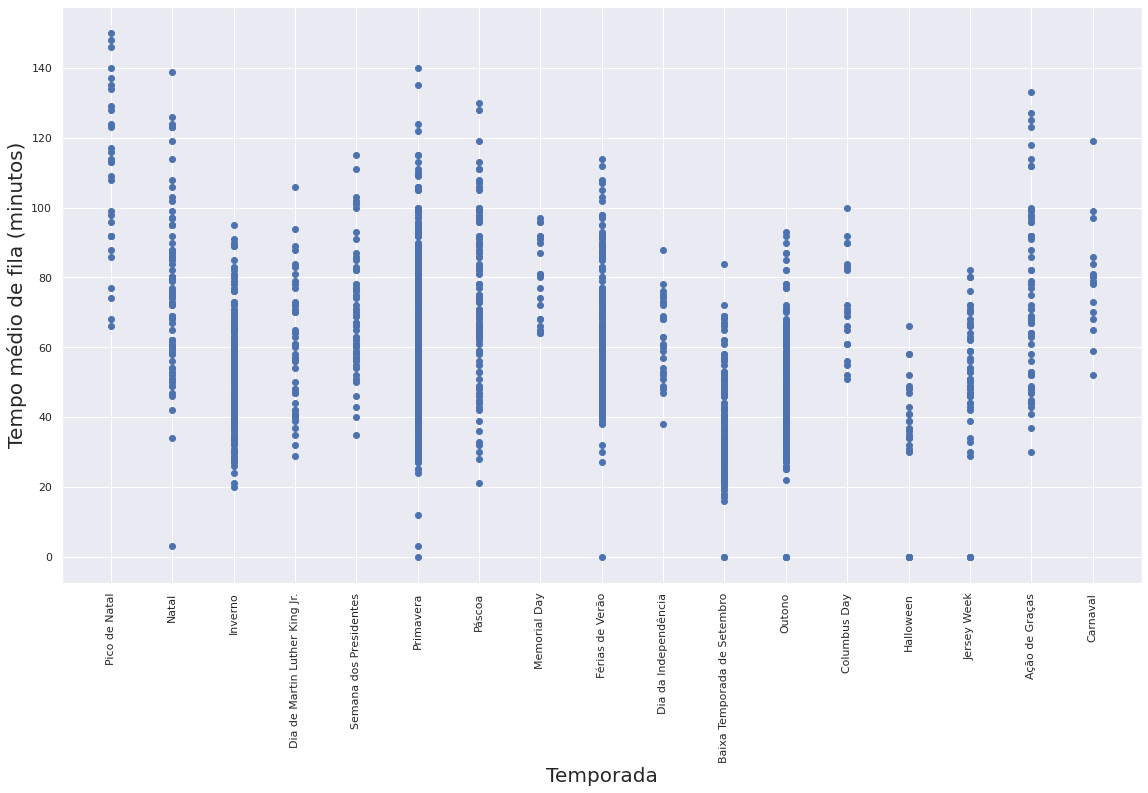

In [105]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Temporada'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Temporada', fontsize = 20)  
eixo.set_ylabel('Tempo médio de fila (minutos)', fontsize = 20)
plt.xticks(rotation = 90)

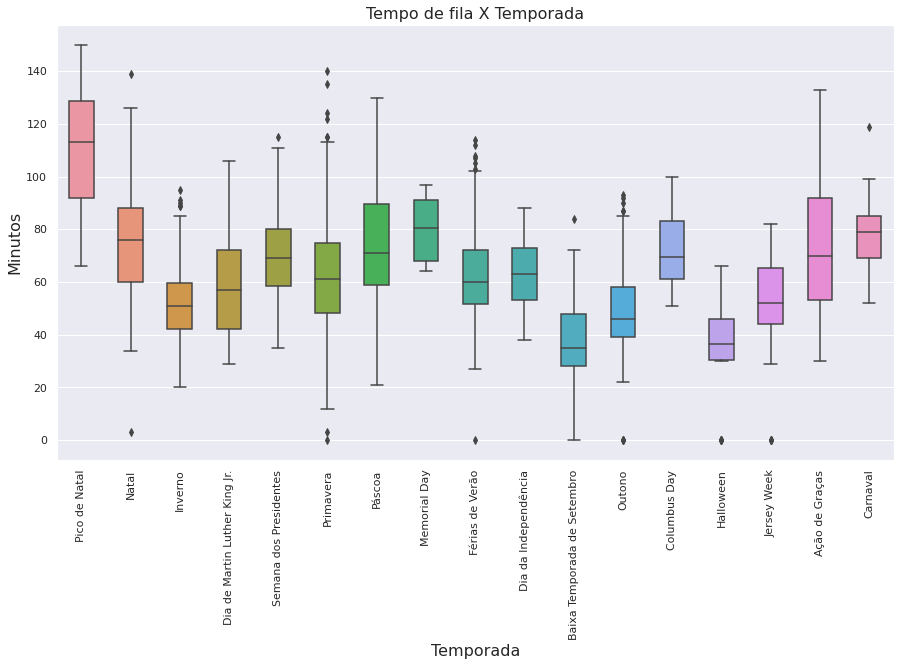

In [106]:
ax = sns.boxplot(y = 'TEMPO_MEDIO_DE_FILA', x = 'Temporada', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(15, 8)
ax.set_title('Tempo de fila X Temporada', fontsize = 16)
ax.set_ylabel('Minutos', fontsize = 16)
ax.set_xlabel('Temporada', fontsize = 16)
plt.xticks(rotation=90)
ax

Algumas conclusões:

1. Agora é possível observar movimentos diferentes em épocas diferentes do ano. Ainda que em quase todas as épocas hajam dias de grande movimento, as distribuições não são tão parecidas entre si quanto as dos meses;

2. Fica óbvio que o período mais movimentado é o Pico de Natal, que compreende a semana do natal e ano novo. Isso pode ser concluído pois Q1 está acima de quase todos os valores de Q3 das demais épocas;

3. A temporadas de menor movimento são o Inverno, Baixa Temp. de Setembro, Outono e Halloween. Mesmo apresentando dias com fila acima dos 80 minutos, estes são *outliers*.

## <font color=green>7.4 Tempo de fila X Feriado</font>
***

Text(0, 0.5, 'Tempo médio de fila (minutos)')

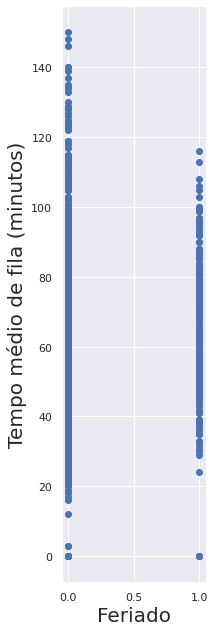

In [107]:
fig = plt.figure(figsize = (2,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Feriado'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Feriado', fontsize = 20)  
eixo.set_ylabel('Tempo médio de fila (minutos)', fontsize = 20)

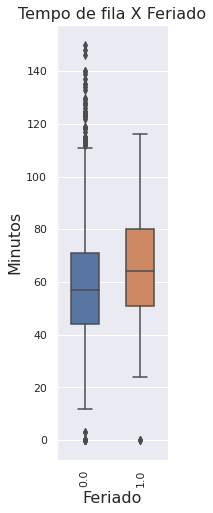

In [108]:
ax = sns.boxplot(y = 'TEMPO_MEDIO_DE_FILA', x = 'Feriado', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(2, 8)
ax.set_title('Tempo de fila X Feriado', fontsize = 16)
ax.set_ylabel('Minutos', fontsize = 16)
ax.set_xlabel('Feriado', fontsize = 16)
plt.xticks(rotation=90)
ax

Em dias de feriado, os tempos de fila tendem a estar levemente mais altos do que nos demais. Porém, com uma maior presença de *outliers* quando a variável feriado é igual à zero (não), ao invés de considerarmos a ocorrência ou não de feriados, vamos levar em conta à proximidade de uma data comemorativa.

## <font color=green>7.5 Tempo de fila X Proximidade de Feriado</font>
***

Text(0, 0.5, 'Tempo médios de fila (minutos)')

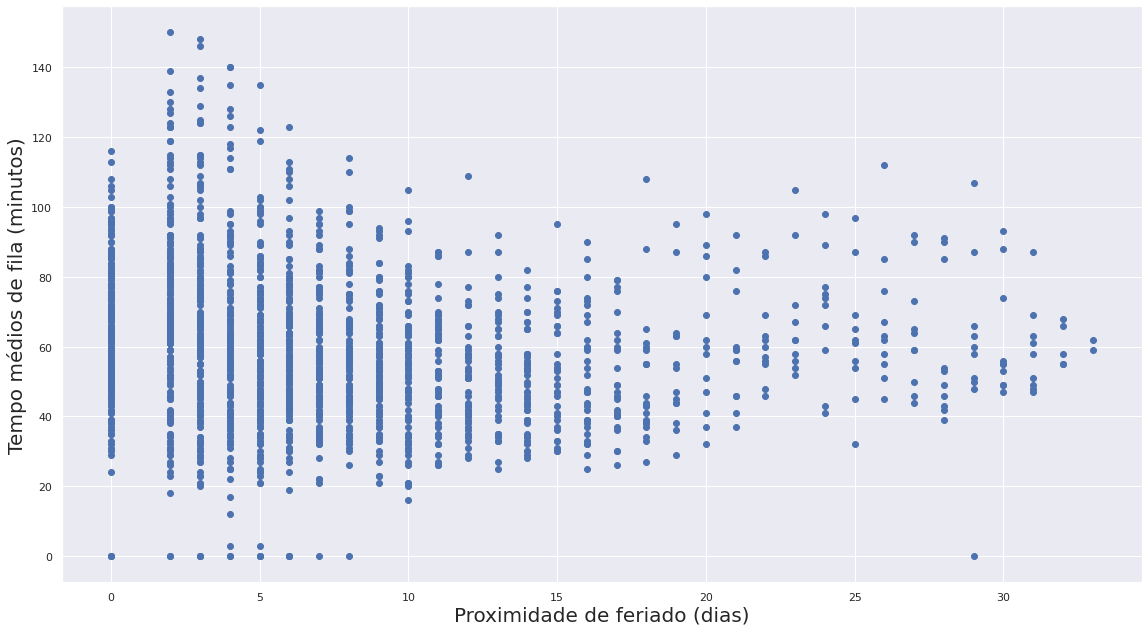

In [109]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Proximidade_de_feriado'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Proximidade de feriado (dias)', fontsize = 20)  
eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)

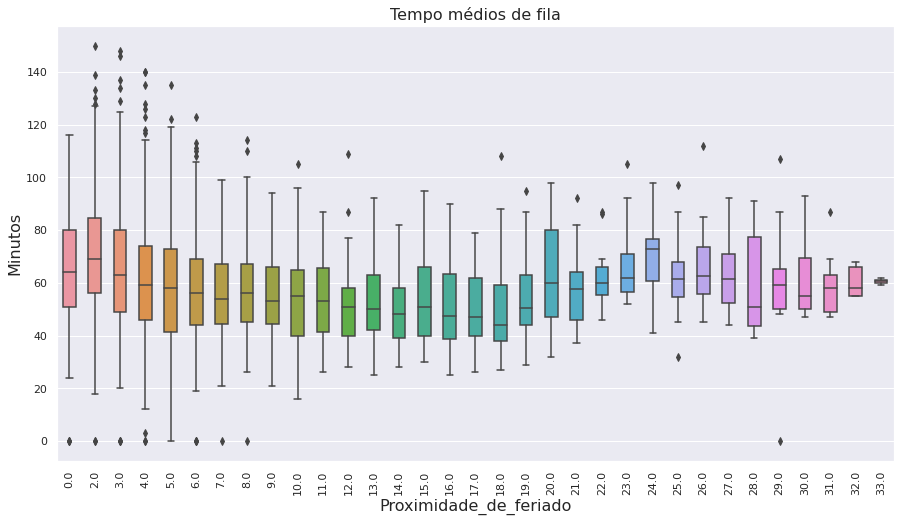

In [110]:
ax = sns.boxplot(y = 'TEMPO_MEDIO_DE_FILA', 
                 x = 'Proximidade_de_feriado', 
                 data = dados, 
                 orient = 'v', 
                 width = 0.5)
ax.figure.set_size_inches(15, 8)
ax.set_title('Tempo médios de fila', fontsize = 16)
ax.set_ylabel('Minutos', fontsize = 16)
ax.set_xlabel('Proximidade_de_feriado', fontsize = 16)
plt.xticks(rotation=90)
ax

Algumas conclusões:

1. É possível notar que quanto mais próximo de uma data comemorativa, maiores são os valores de Q1, Q2 e Q3 e maior é a ocorrência de desvios, ou *outliers*;

2. Essa "regra" descrita no item acima parece valer apenas até, aproximadamente, 18 dias, pois acima disso, os valores dos quartis se elevam e oscilam bastante. O que pode justificar isso é, primeiramente, a existência de poucos dias distantes de algum feriado, o que resultaria numa distribuição mais "truncada" e, uma segunda hipótese, longos períodos de grande movimento sem algum feriado propriamente dito no período.

## <font color=green>7.6 Tempo de fila X Temperaturas Máxima, Mínima e Média</font>
***

Text(0, 0.5, 'Tempo médios de fila (minutos)')

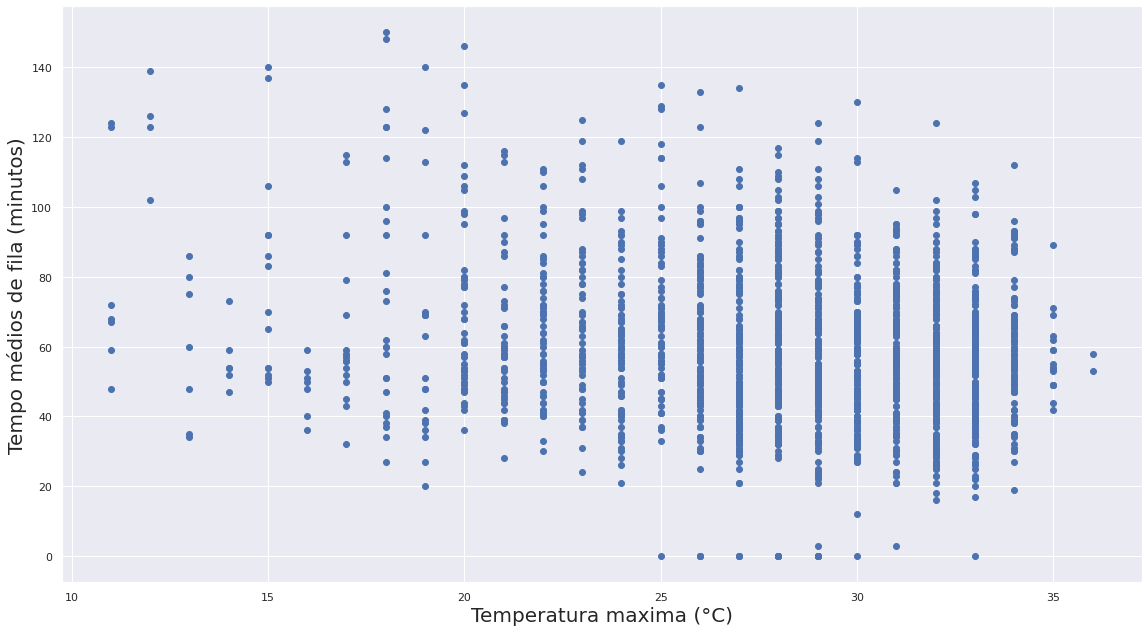

In [111]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Temperatura_maxima'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Temperatura maxima (°C)', fontsize = 20)  
eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)

Text(0, 0.5, 'Tempo médios de fila (minutos)')

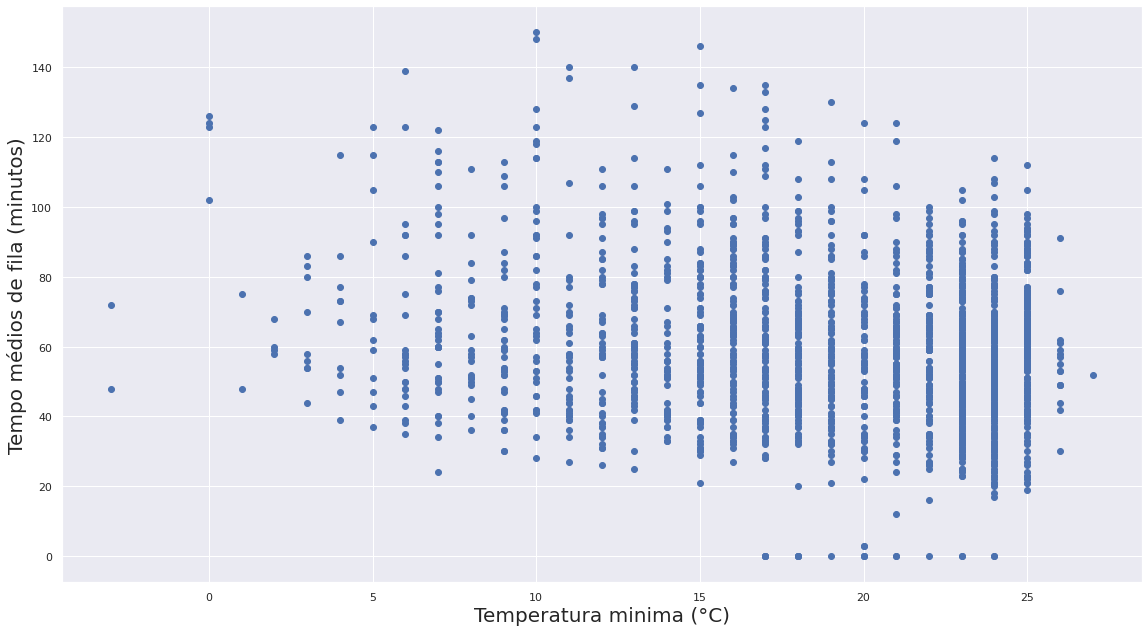

In [112]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Temperatura_minima'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Temperatura minima (°C)', fontsize = 20)  
eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)

Text(0, 0.5, 'Tempo médios de fila (minutos)')

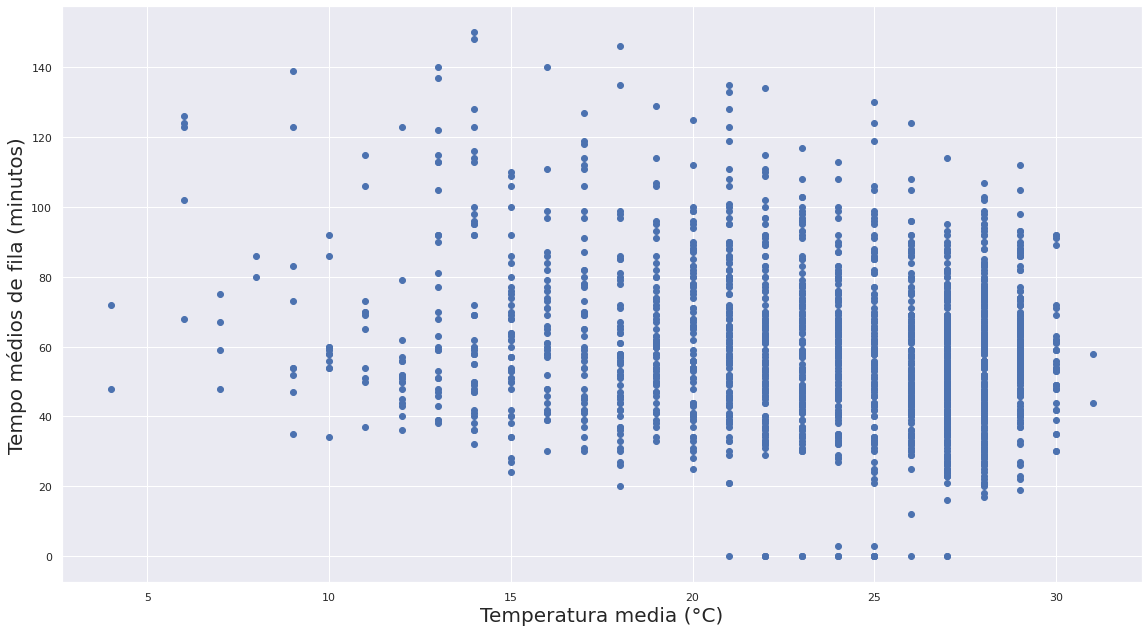

In [113]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.scatter(dados['Temperatura_media'], dados['TEMPO_MEDIO_DE_FILA'])
eixo.set_xlabel('Temperatura media (°C)', fontsize = 20)  
eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)

Aparentemente, as temperaturas mais elevadas tendem a vir acompanhadas de dias de grande movimento.  Pelos gráficos, observamos que a maior parte dos dados estão concentrados nas temperaturas mais elevadas. Porém, a correlação entre as duas variáveis só será evidenciada mais adiante.